# Step-1: Bussiness Problem Understanding
- The primary objective is to build a predictive model that accurately predicts, what is the probability whether a person will get the admission

# Step-2: Data Understanding
- shape, size, info
- understand each and every variable(column_name) by applying unique(), value_counts()
- List the discrete and continuous variables separately   
**Descriptive statistics**   
  - For continuous, apply describe()   
  - For discrete, apply value_counts()     
**Explanatory Data Analysis**---EDA   
  - Understanding the raw data by applying pandas,matplotlib,seaborn
  - check and list  
     -missing values   
     -outliers   
     -skewed   
     -discrete nominal and discrete ordinal

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

**Importing/Loading the data**

In [3]:
df=pd.read_csv("admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.size

4500

In [5]:
df.shape

(500, 9)

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.rename(columns={"GRE Score":"GRE", "TOEFL Score":"TOEFL", "LOR ":"LOR", "Chance of Admit ":"Probability"},inplace=True)
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Descriptive Statistics**

In [9]:
df["Serial No."].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
df["Serial No."].value_counts()

Serial No.
1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: count, Length: 500, dtype: int64

In [11]:
df["GRE"].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [12]:
df["GRE"].value_counts()

GRE
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: count, dtype: int64

In [13]:
df["TOEFL"].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

In [14]:
df["TOEFL"].value_counts()

TOEFL
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: count, dtype: int64

In [15]:
df["University Rating"].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

In [16]:
df["University Rating"].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [17]:
df["SOP"].value_counts()

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64

In [18]:
df["SOP"].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [19]:
df["LOR"].value_counts()

LOR
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64

In [20]:
df["LOR"].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [21]:
df["CGPA"].value_counts()

CGPA
8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: count, Length: 184, dtype: int64

In [22]:
df["CGPA"].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [23]:
df["Research"].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [24]:
df["Research"].unique()

array([1, 0], dtype=int64)

In [25]:
df["Probability"].value_counts()

Probability
0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: count, Length: 61, dtype: int64

In [26]:
df["Probability"].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [27]:
df.columns.tolist()

['Serial No.',
 'GRE',
 'TOEFL',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Probability']

In [28]:
continuous=["Serial No.", "GRE", "TOEFL", "University Rating", "SOP", "LOR", "CGPA", "Research", "Probability"]

In [29]:
df[continuous].describe()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [30]:
df[continuous].skew()

Serial No.           0.000000
GRE                 -0.039842
TOEFL                0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Probability         -0.289966
dtype: float64

**Explanatory Data Analysis**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE                500 non-null    int64  
 2   TOEFL              500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Probability        500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**GRE**
- Histogram
- Boxplot

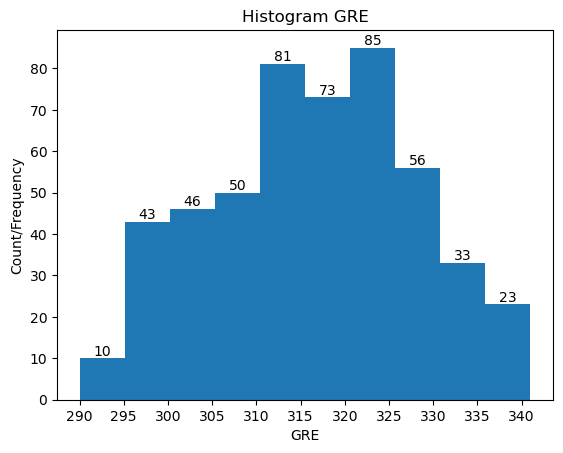

In [32]:
# GRE-----Histogram
n,bins,patches=plt.hist(df["GRE"],bins=10,range=(290,341))
plt.bar_label(patches)                                         # count of each bar
plt.xlabel("GRE")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                  # set the label for the y-axis
plt.title("Histogram GRE")                                     # set title for the plot
plt.xticks(list(range(290,341,5)))                               # x-axis values presentation
plt.show()

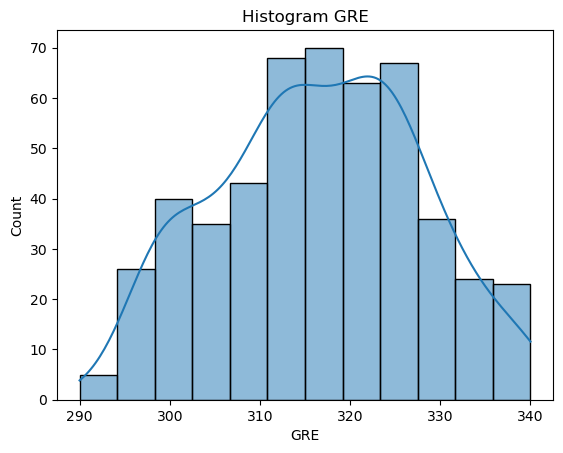

In [33]:
# GRE-----Histogram
plt.title("Histogram GRE")

sns.histplot(df["GRE"],kde=True)
plt.show()

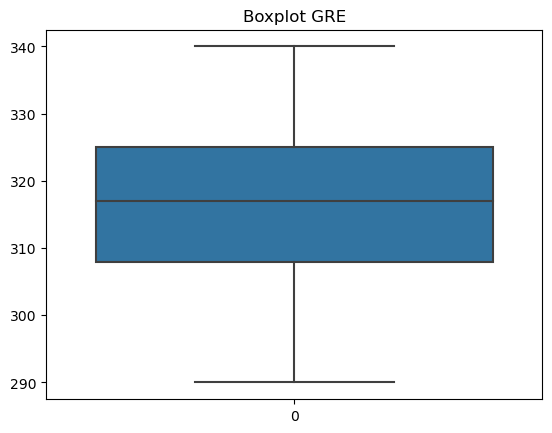

In [34]:
# BOXPLOT
plt.title("Boxplot GRE")

sns.boxplot(df["GRE"])
plt.show()

**TOEFL**
- Histogram
- Boxplot

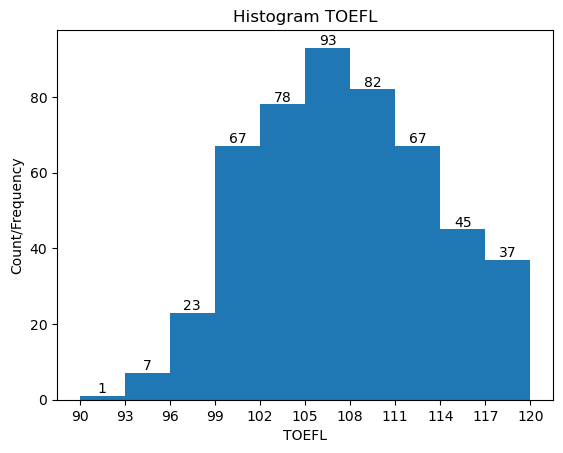

In [35]:
#TOEFL-----Histogram
n,bins,patches=plt.hist(df["TOEFL"],bins=10,range=(90,120))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("TOEFL")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram TOEFL")                                     # set title for the plot
plt.xticks(list(range(90,121,3)))                               # x-axis values presentation
plt.show()

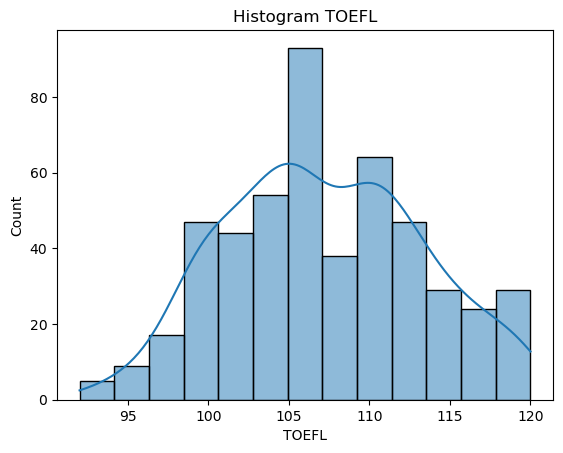

In [36]:
#TOEFL-----Histogram
plt.title("Histogram TOEFL")

sns.histplot(df["TOEFL"],kde=True)
plt.show()

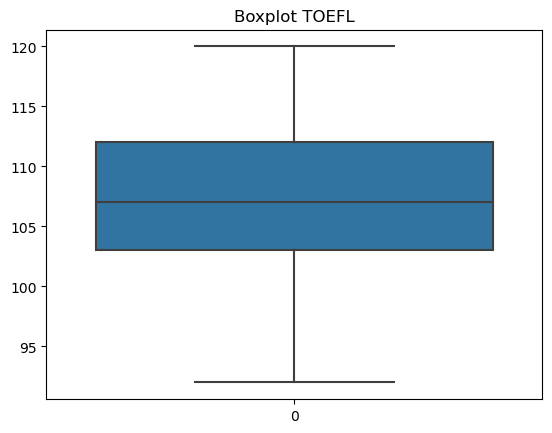

In [37]:
# BOXPLOT
plt.title("Boxplot TOEFL")

sns.boxplot(df["TOEFL"])
plt.show()

**University Rating**
- Histogram
- Boxplot

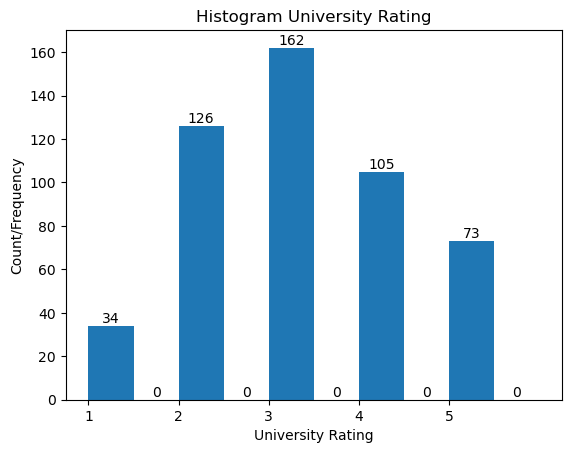

In [38]:
#University Rating-----Histogram
n,bins,patches=plt.hist(df["University Rating"],bins=10,range=(1,6))
plt.bar_label(patches)                                                       # count of each bar
plt.xlabel("University Rating")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                                # set the label for the y-axis
plt.title("Histogram University Rating")                                     # set title for the plot
plt.xticks(list(range(1,6)))                                                 # x-axis values presentation
plt.show()

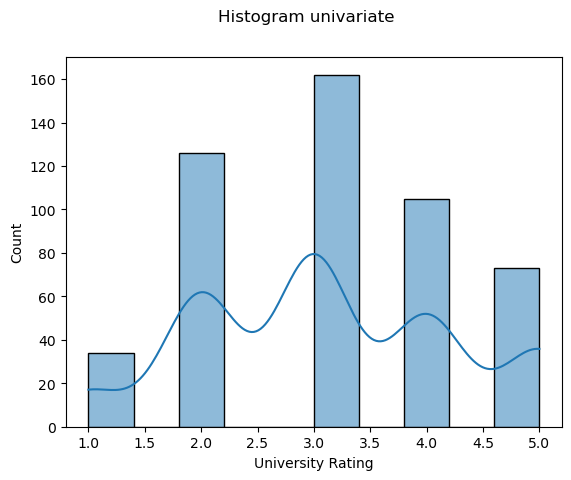

In [39]:
# Histogram-----University Rating
plt.suptitle("Histogram univariate")

sns.histplot(df["University Rating"],kde=True)
plt.show()

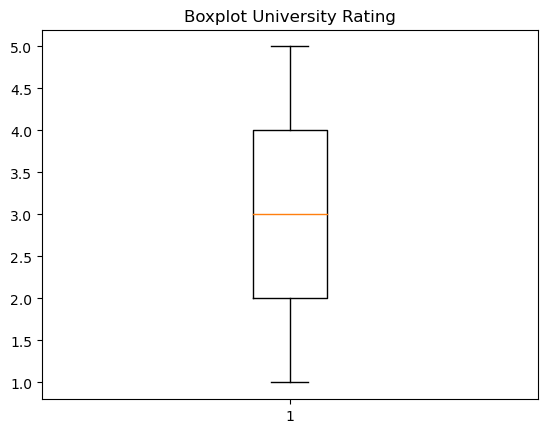

In [40]:
# University Rating-----Boxplot
plt.title("Boxplot University Rating")

plt.boxplot(df["University Rating"])
plt.show()

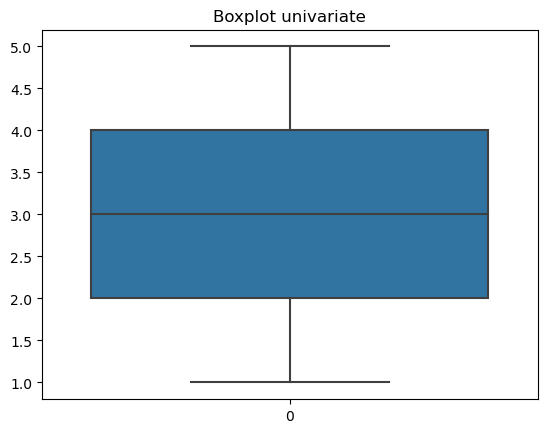

In [41]:
# Boxplot-----University Rating
plt.title("Boxplot univariate")

sns.boxplot(df["University Rating"])
plt.show()

**SOP**
- Histogram
- Boxplot

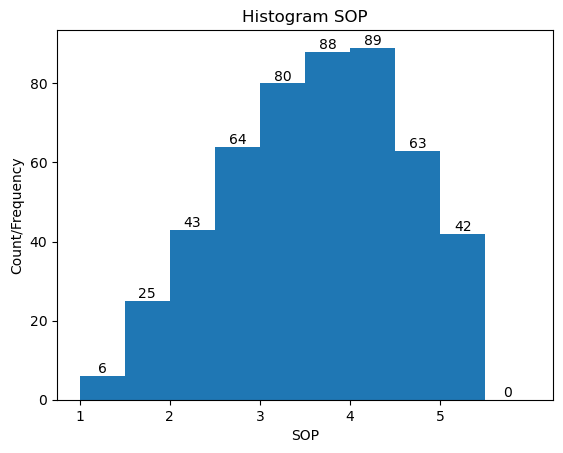

In [42]:
# SOP-----Histogram
n,bins,patches=plt.hist(df["SOP"],bins=10,range=(1,6))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("SOP")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram SOP")                                     # set title for the plot
plt.xticks(list(range(1,6)))                               # x-axis values presentation
plt.show()

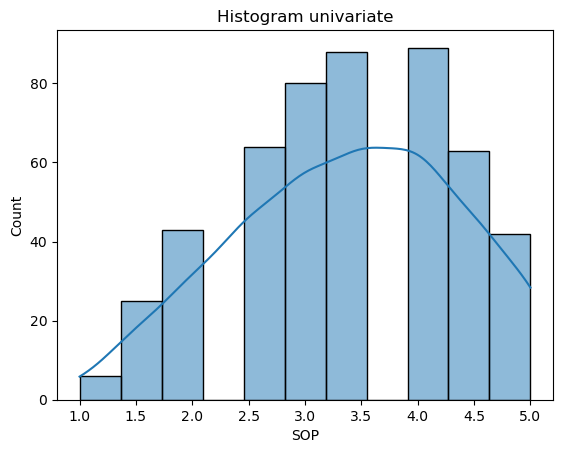

In [43]:
# SOP-----Histogram
plt.title("Histogram univariate")

sns.histplot(df["SOP"],kde=True)
plt.show()

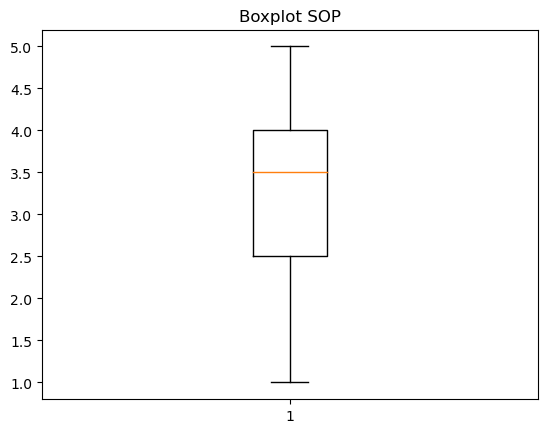

In [44]:
# SOP-----Boxplot
plt.title("Boxplot SOP")

plt.boxplot(df["SOP"])
plt.show()

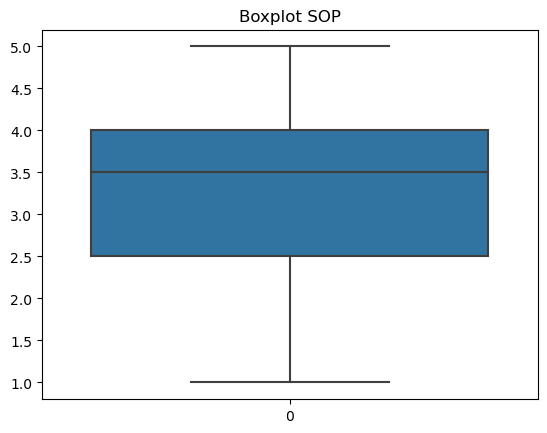

In [45]:
# SOP-----Boxplot
plt.title("Boxplot SOP")

sns.boxplot(df["SOP"])
plt.show()

**LOR**
- Histogram
- Boxplot

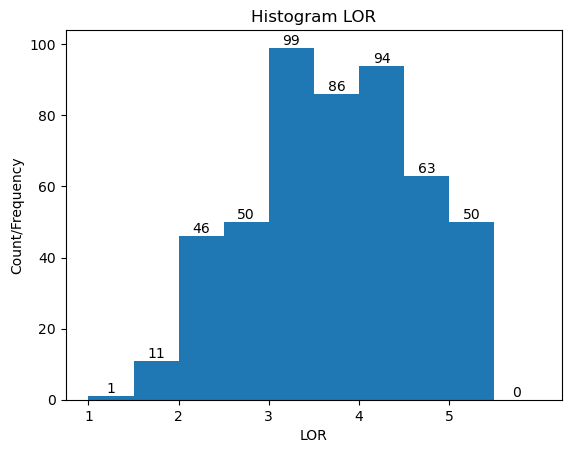

In [46]:
#LOR-----Histogram
n,bins,patches=plt.hist(df["LOR"],bins=10,range=(1,6))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("LOR")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram LOR")                                     # set title for the plot
plt.xticks(list(range(1,6)))                               # x-axis values presentation
plt.show()

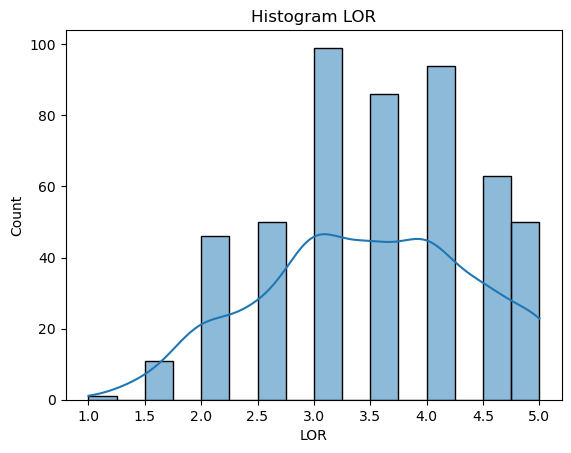

In [47]:
# LOR-----Histogram
plt.title("Histogram LOR")

sns.histplot(df["LOR"],kde=True)
plt.show()

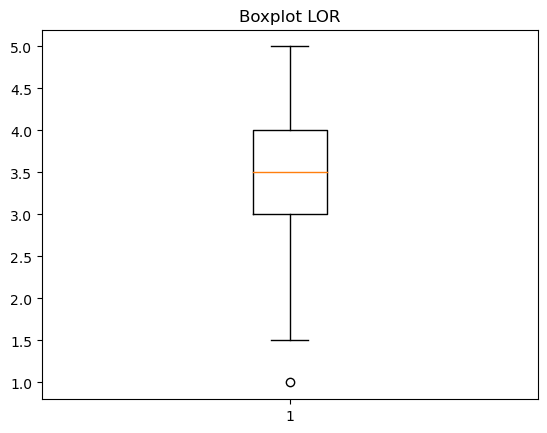

In [48]:
# LOR-----Boxplot
plt.title("Boxplot LOR")

plt.boxplot(df["LOR"])
plt.show()

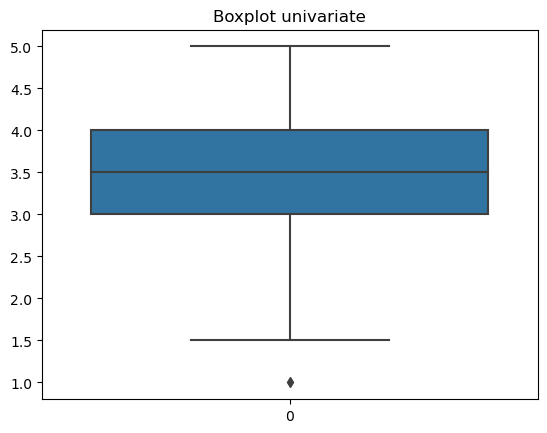

In [49]:
# LOR-----Boxplot
plt.title("Boxplot univariate")

sns.boxplot(df["LOR"])
plt.show()

**CGPA**
- Histogram
- Boxplot

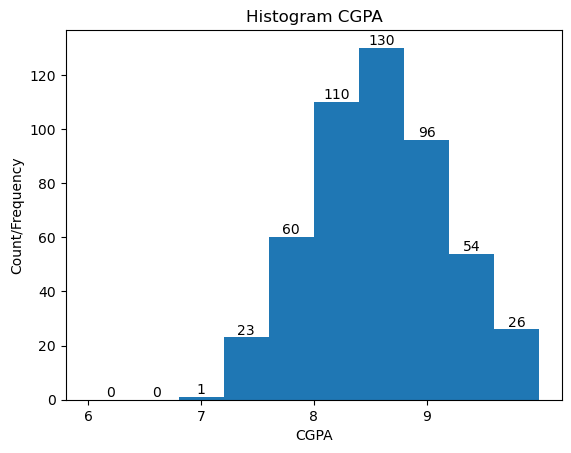

In [50]:
# CGPA-----Histogram
n,bins,patches=plt.hist(df["CGPA"],bins=10,range=(6,10))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("CGPA")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram CGPA")                                     # set title for the plot
plt.xticks(list(range(6,10)))                               # x-axis values presentation
plt.show()

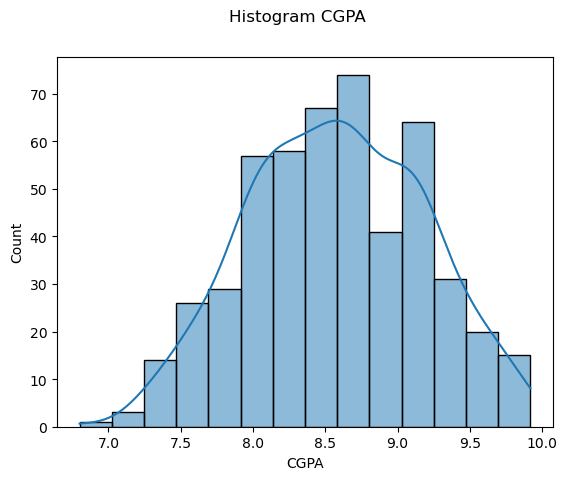

In [51]:
# CGPA-----Histogram
plt.suptitle("Histogram CGPA")

sns.histplot(df["CGPA"],kde=True)
plt.show()

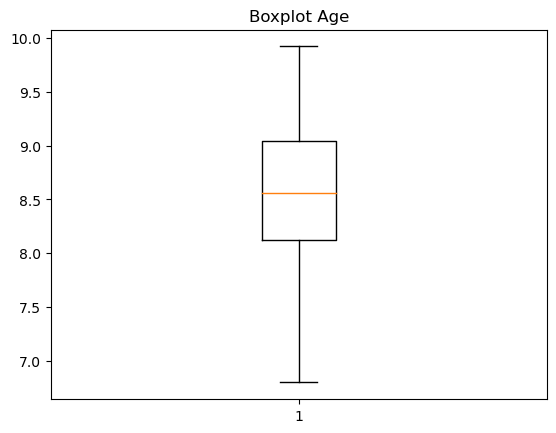

In [52]:
# CGPA-----Boxplot
plt.title("Boxplot Age")

plt.boxplot(df["CGPA"])
plt.show()

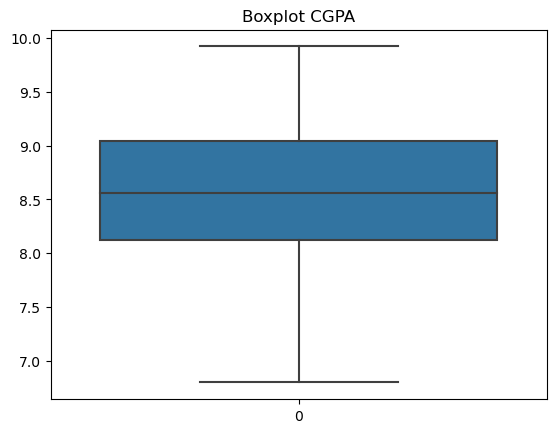

In [53]:
# CGPA-----Boxplot
plt.title("Boxplot CGPA")

sns.boxplot(df["CGPA"])
plt.show()

**Probability**
- Histogram
- Boxplot

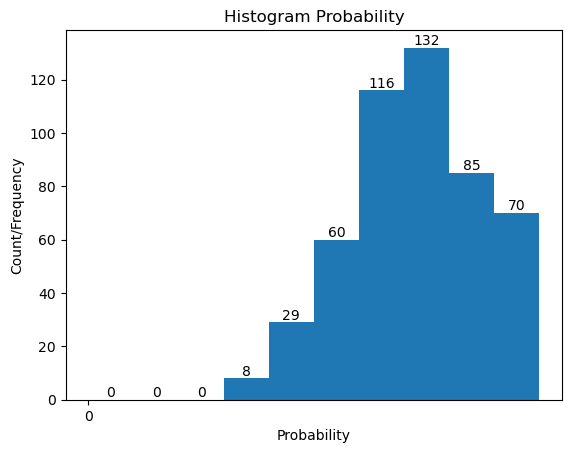

In [54]:
# Probability-----Histogram
n,bins,patches=plt.hist(df["Probability"],bins=10,range=(0,1))
plt.bar_label(patches)                                                 # count of each bar
plt.xlabel("Probability")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                          # set the label for the y-axis
plt.title("Histogram Probability")                                     # set title for the plot
plt.xticks(list(range(0,1)))                                          # x-axis values presentation
plt.show()

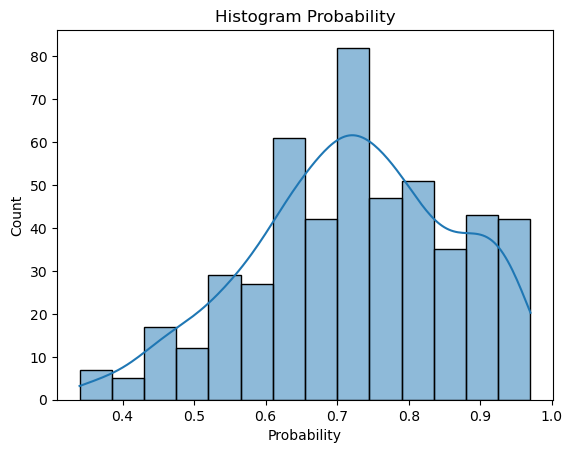

In [55]:
# Probability-----Histogram
plt.title("Histogram Probability")

sns.histplot(df["Probability"],kde=True)
plt.show()

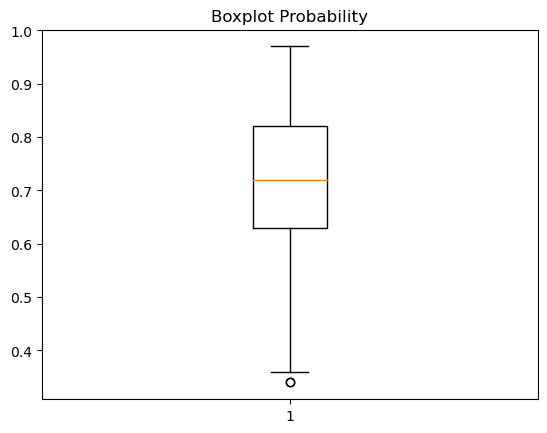

In [56]:
# Probability-----Boxplot
plt.title("Boxplot Probability")

plt.boxplot(df["Probability"])
plt.show()

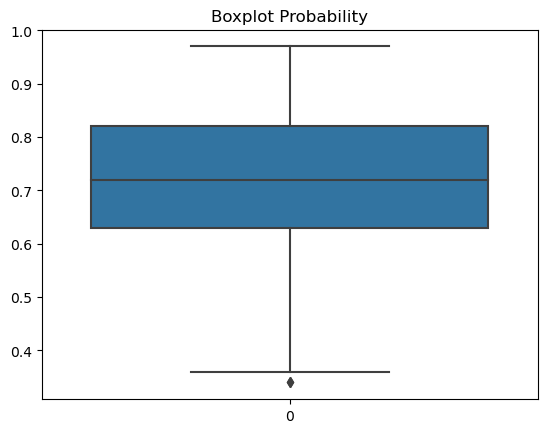

In [57]:
# Probability-----Boxplot
plt.title("Boxplot Probability")

sns.boxplot(df["Probability"])
plt.show()

**Research**
- Histogram
- Boxplot

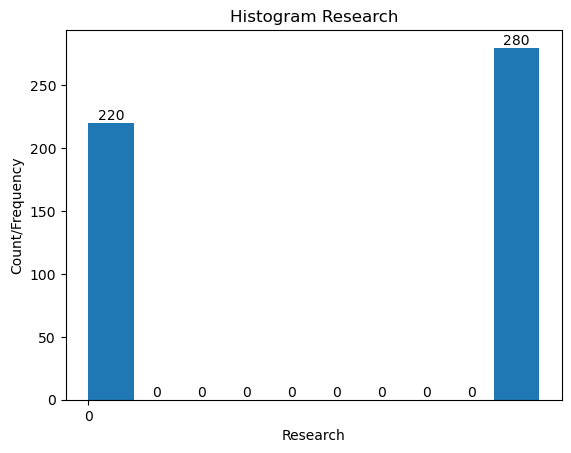

In [58]:
# Research-----Histogram
n,bins,patches=plt.hist(df["Research"],bins=10,range=(0,1))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("Research")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram Research")                                     # set title for the plot
plt.xticks(list(range(0,1)))                               # x-axis values presentation
plt.show()

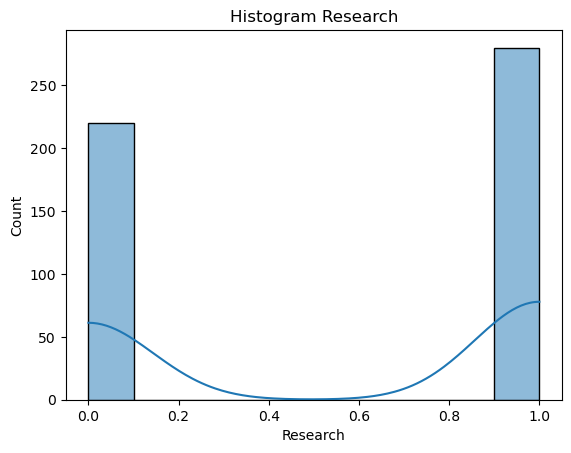

In [59]:
# Research-----Histogram
plt.title("Histogram Research")

sns.histplot(df["Research"],kde=True)
plt.show()

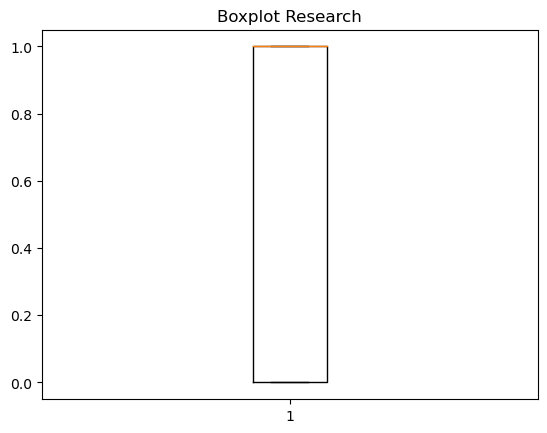

In [60]:
# Research-----Boxplot
plt.title("Boxplot Research")

plt.boxplot(df["Research"])
plt.show()

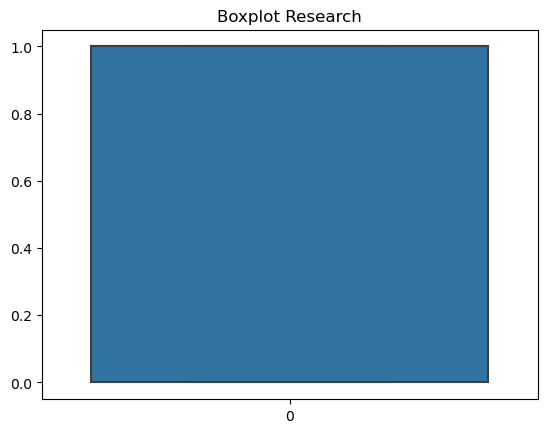

In [61]:
# Research-----Boxplot
plt.title("Boxplot Research")

sns.boxplot(df["Research"])
plt.show()

**GRE-Probability**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

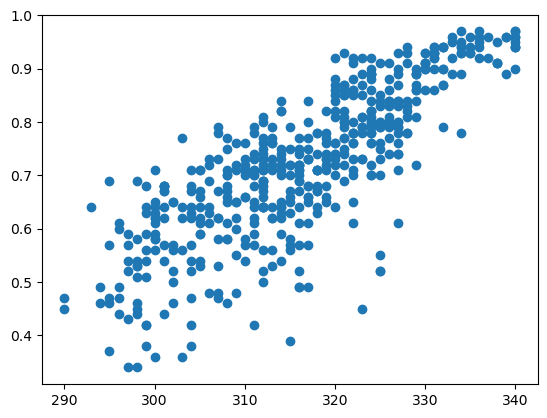

In [62]:
# GRE,Probability-----scatterplot
plt.scatter(x=df["GRE"],y=df["Probability"])
plt.show()

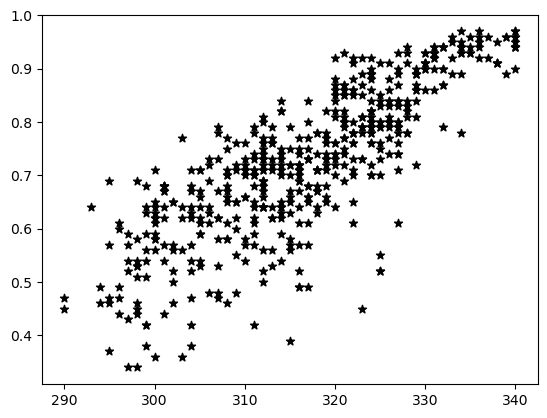

In [63]:
# GRE,Probability-----scatterplot
plt.scatter(x=df["GRE"],y=df["Probability"],marker="*",color="black")
plt.show()

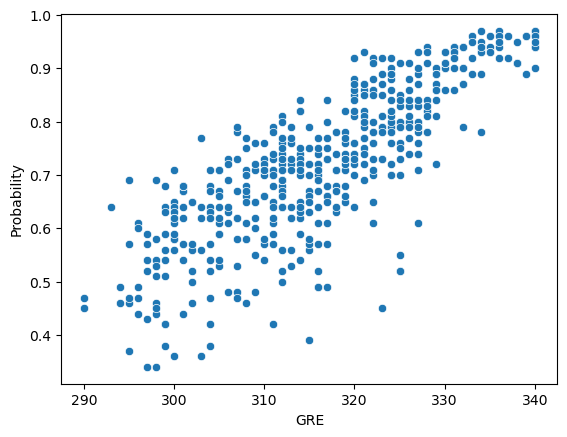

In [64]:
# GRE,Probability-----scatterplot
sns.scatterplot(x=df["GRE"],y=df["Probability"])
plt.show()

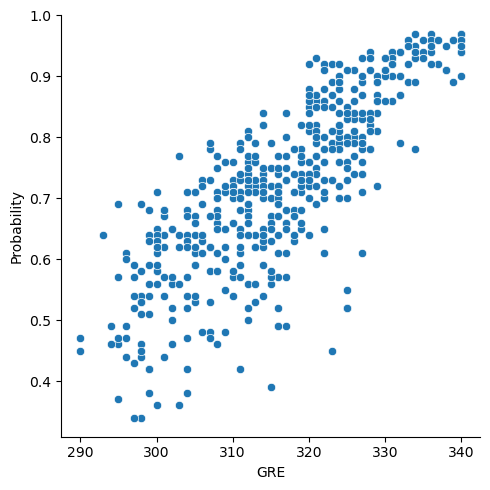

In [65]:
# GRE,Probability-----relplot
sns.relplot(x=df["GRE"],y=df["Probability"])
plt.show()

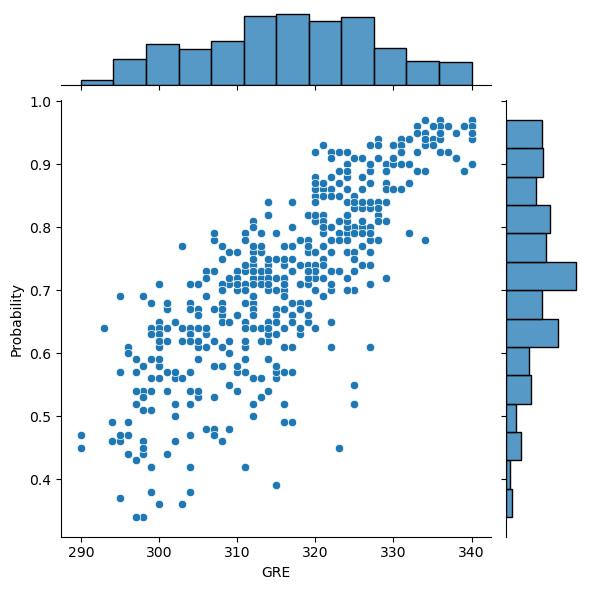

In [66]:
# GRE,Probability-----jointplot
sns.jointplot(x=df["GRE"],y=df["Probability"])
plt.show()

**TOEFL-Probability**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

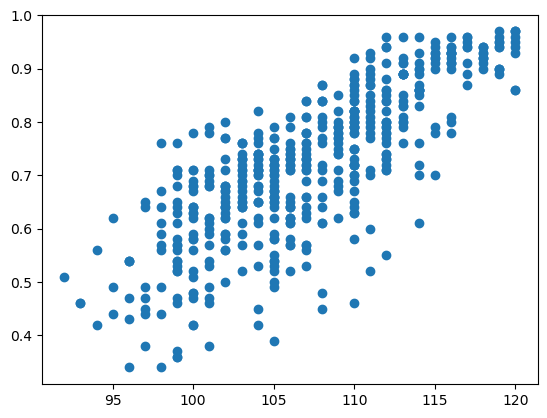

In [67]:
# TOEFL,Probability-----scatterplot
plt.scatter(x=df["TOEFL"],y=df["Probability"])
plt.show()

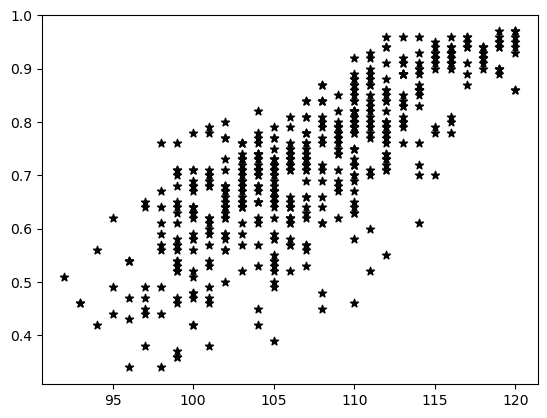

In [68]:
# TOEFL,Probability-----scatterplot
plt.scatter(x=df["TOEFL"],y=df["Probability"],marker="*",color="black")
plt.show()

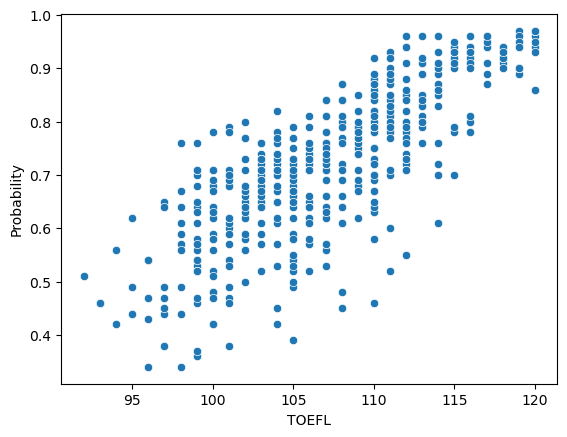

In [69]:
# TOEFL,Probability-----scatterplot
sns.scatterplot(x=df["TOEFL"],y=df["Probability"])
plt.show()

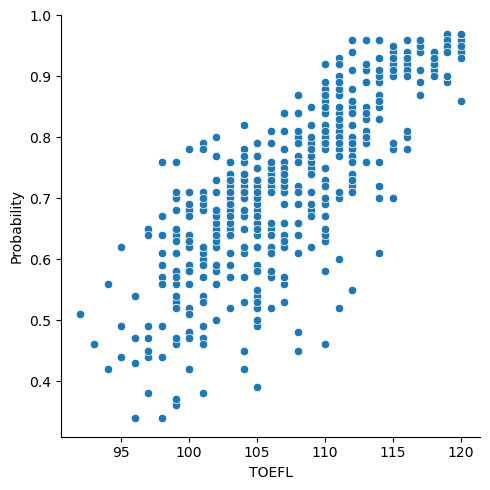

In [70]:
# TOEFL,Probability-----relplot
sns.relplot(x=df["TOEFL"],y=df["Probability"])
plt.show()

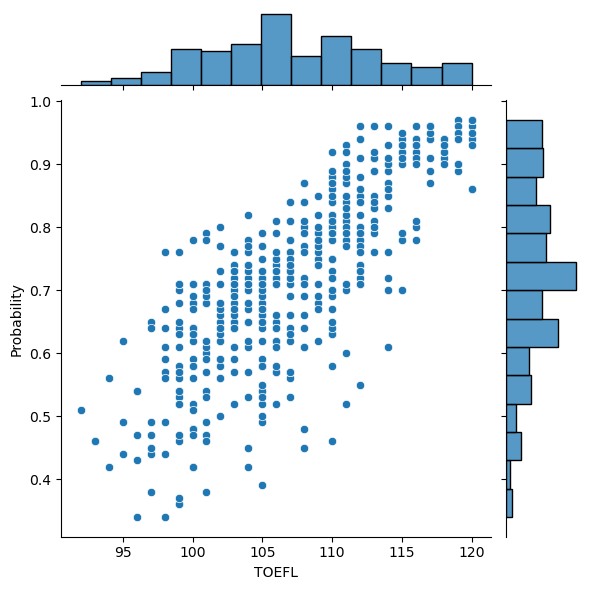

In [71]:
# TOEFL,Probability-----jointplot
sns.jointplot(x=df["TOEFL"],y=df["Probability"])
plt.show()

**University Rating-Probability**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

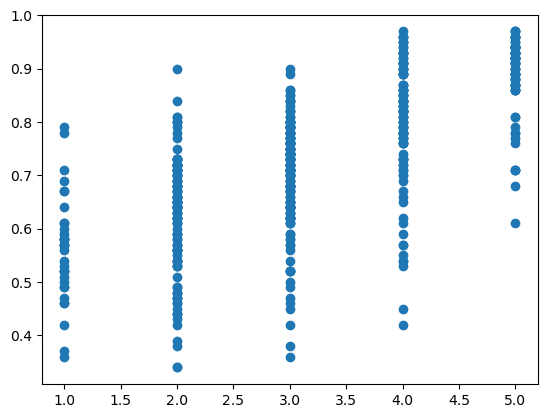

In [72]:
# University Rating,Probability-----scatterplot
plt.scatter(x=df["University Rating"],y=df["Probability"])
plt.show()

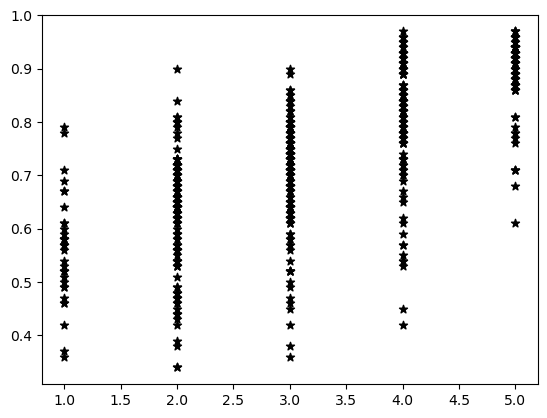

In [73]:
# University Rating,Probability-----scatterplot
plt.scatter(x=df["University Rating"],y=df["Probability"],marker="*",color="black")
plt.show()

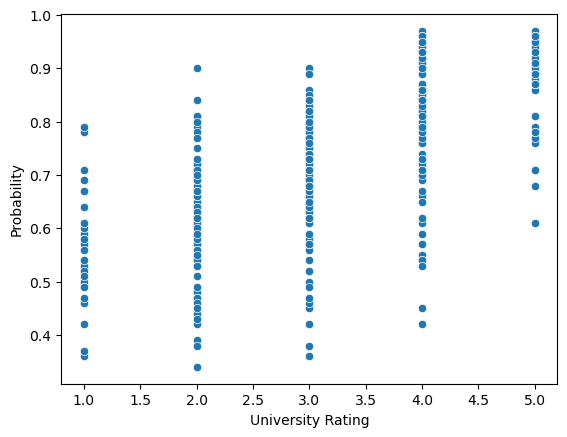

In [74]:
# University Rating,Probability-----scatterplot
sns.scatterplot(x=df["University Rating"],y=df["Probability"])
plt.show()

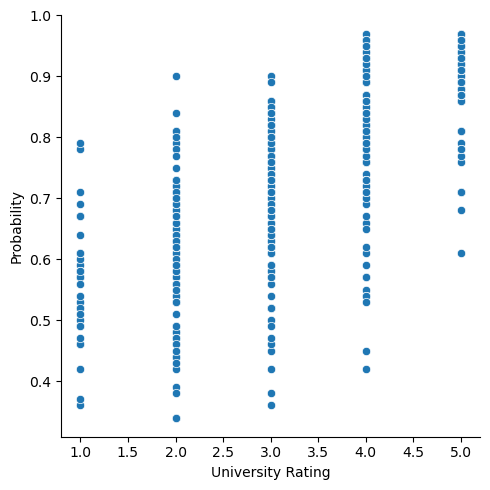

In [75]:
# University Rating,Probability-----relplot
sns.relplot(x=df["University Rating"],y=df["Probability"])
plt.show()

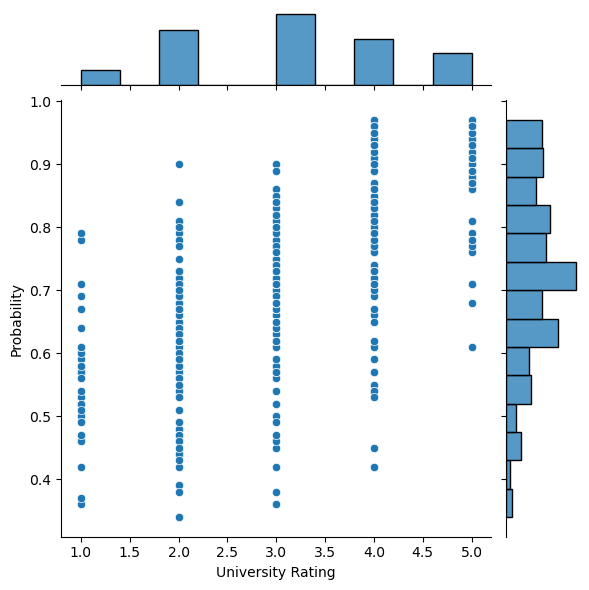

In [76]:
# University Rating,Probability-----jointplot
sns.jointplot(x=df["University Rating"],y=df["Probability"])
plt.show()

**SOP-Probability**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

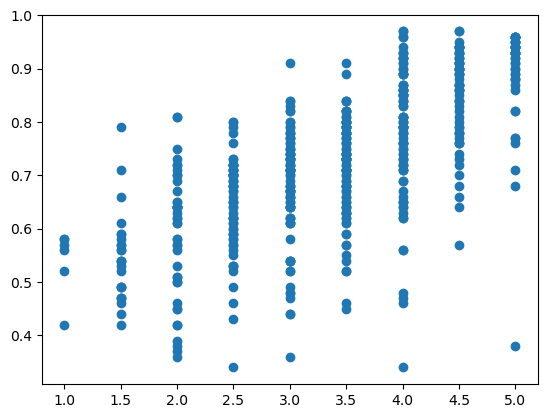

In [77]:
# SOP,Probability-----scatterplot
plt.scatter(x=df["SOP"],y=df["Probability"])
plt.show()

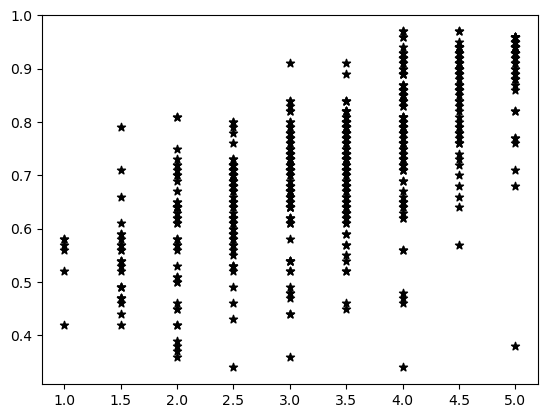

In [78]:
# SOP,Probability-----scatterplot
plt.scatter(x=df["SOP"],y=df["Probability"],marker="*",color="black")
plt.show()

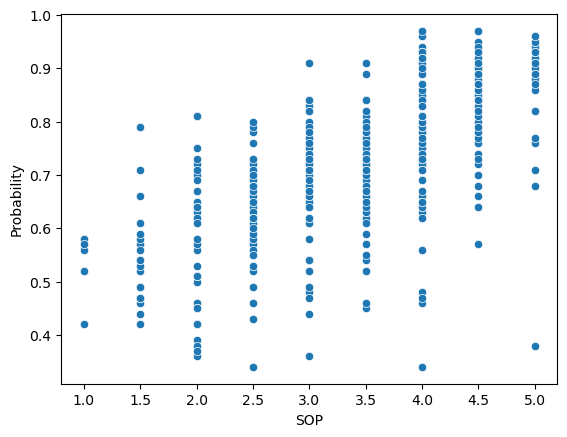

In [79]:
# SOP,Probability-----scatterplot
sns.scatterplot(x=df["SOP"],y=df["Probability"])
plt.show()

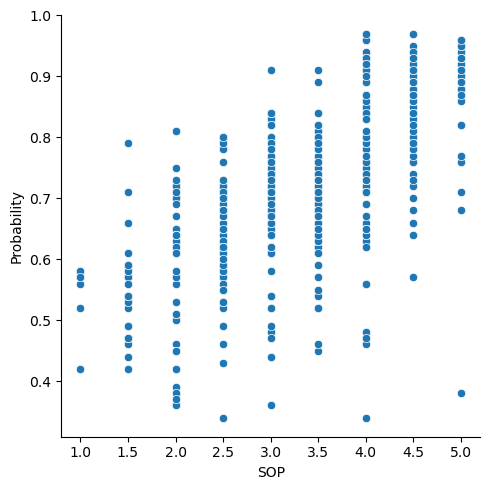

In [80]:
# SOP,Probability-----relplot
sns.relplot(x=df["SOP"],y=df["Probability"])
plt.show()

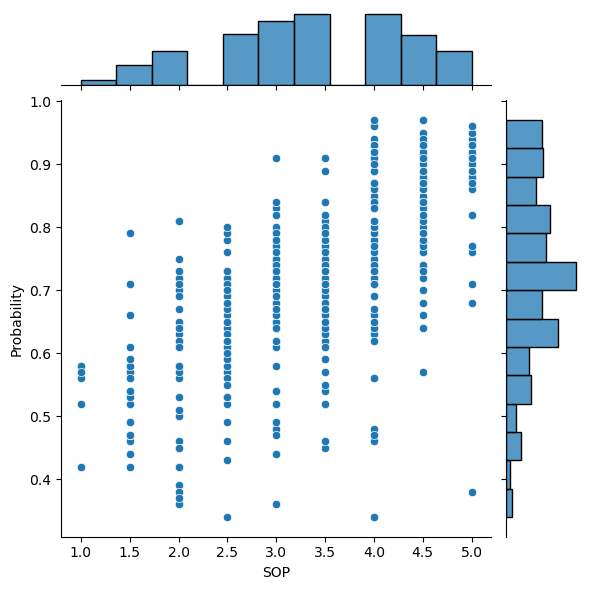

In [81]:
# SOP,Probability-----jointplot
sns.jointplot(x=df["SOP"],y=df["Probability"])
plt.show()

**LOR-Probability**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

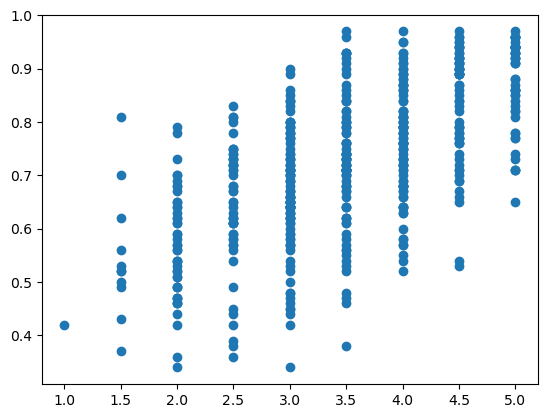

In [82]:
# LOR,Probability-----scatterplot
plt.scatter(x=df["LOR"],y=df["Probability"])
plt.show()

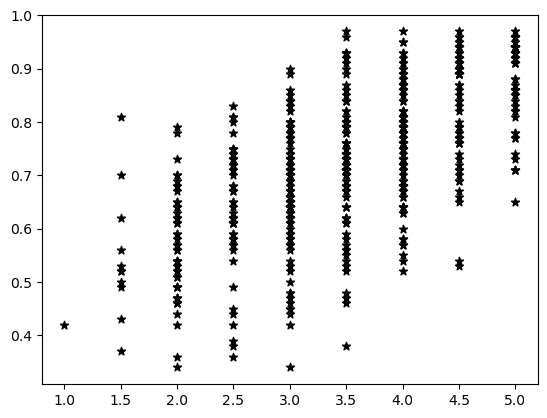

In [83]:
# LOR,Probability-----scatterplot
plt.scatter(x=df["LOR"],y=df["Probability"],marker="*",color="black")
plt.show()

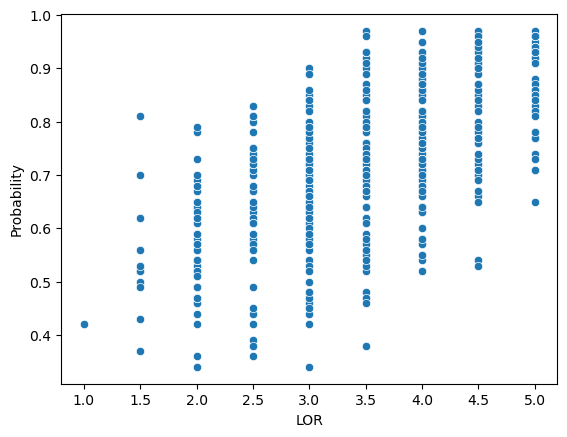

In [84]:
# LOR,Probability-----scatterplot
sns.scatterplot(x=df["LOR"],y=df["Probability"])
plt.show()

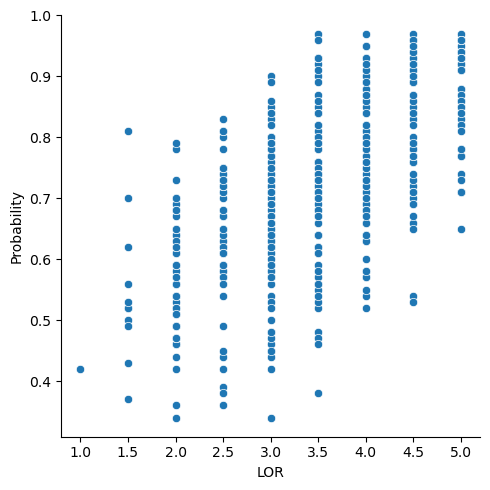

In [85]:
# LOR,Probability-----relplot
sns.relplot(x=df["LOR"],y=df["Probability"])
plt.show()

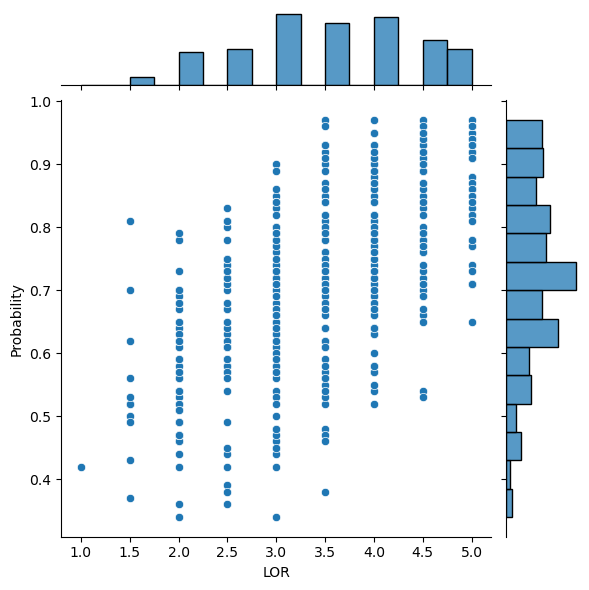

In [86]:
# LOR,Probability-----jointplot
sns.jointplot(x=df["LOR"],y=df["Probability"])
plt.show()

**CGPA-Probability**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

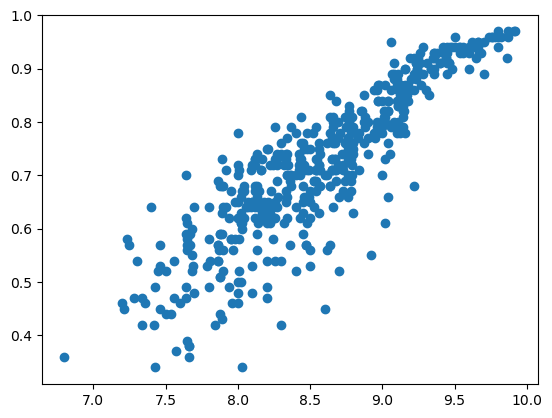

In [87]:
# CGPA,Probability-----scatterplot
plt.scatter(x=df["CGPA"],y=df["Probability"])
plt.show()

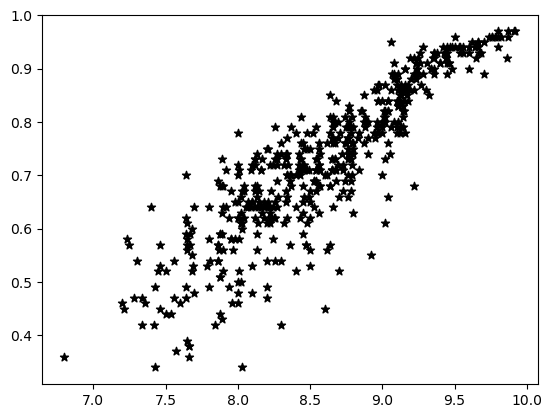

In [88]:
# CGPA,Probability-----scatterplot
plt.scatter(x=df["CGPA"],y=df["Probability"],marker="*",color="black")
plt.show()

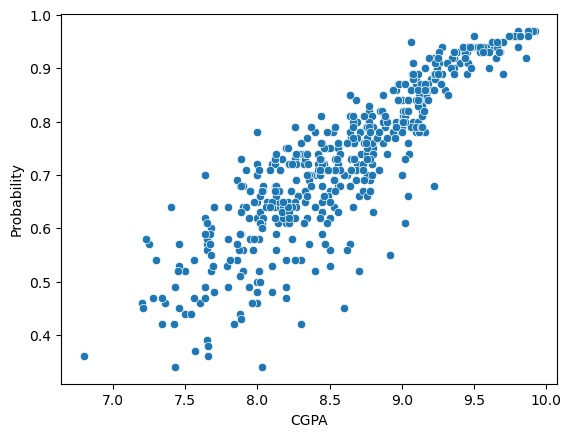

In [89]:
# CGPA,Probability-----scatterplot
sns.scatterplot(x=df["CGPA"],y=df["Probability"])
plt.show()

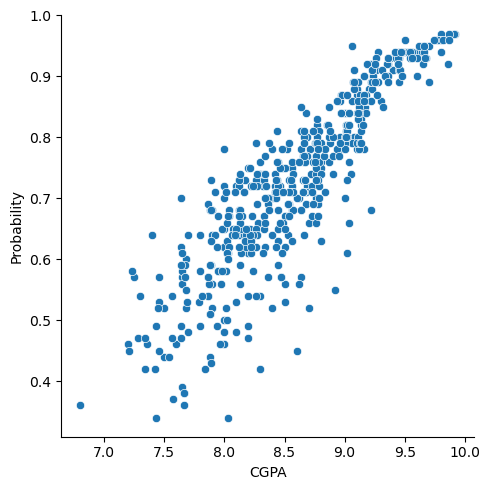

In [90]:
# CGPA,Probability-----relplot
sns.relplot(x=df["CGPA"],y=df["Probability"])
plt.show()

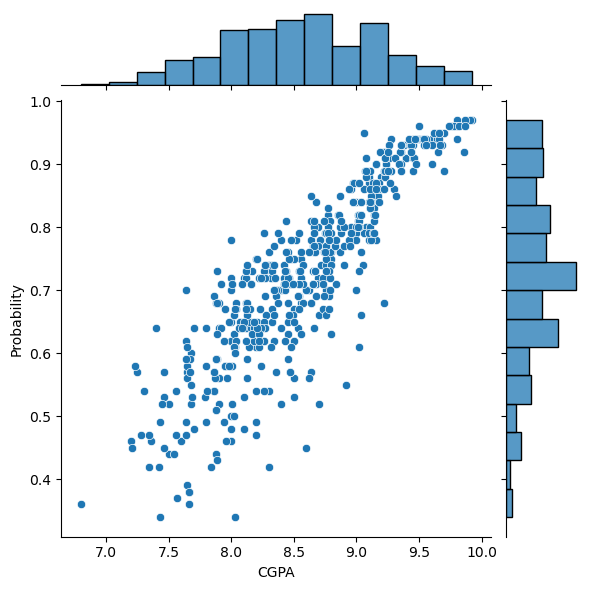

In [91]:
# CGPA,Probability-----jointplot
sns.jointplot(x=df["CGPA"],y=df["Probability"])
plt.show()

**Research-Probability**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

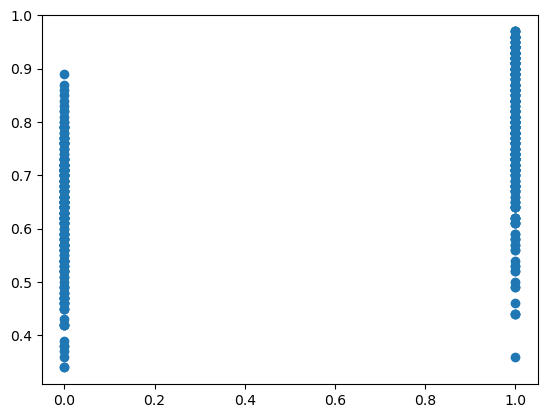

In [92]:
# Research,Probability-----scatterplot
plt.scatter(x=df["Research"],y=df["Probability"])
plt.show()

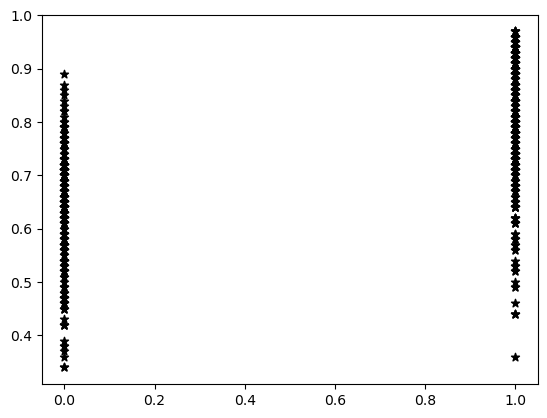

In [93]:
# Research,Probability-----scatterplot
plt.scatter(x=df["Research"],y=df["Probability"],marker="*",color="black")
plt.show()

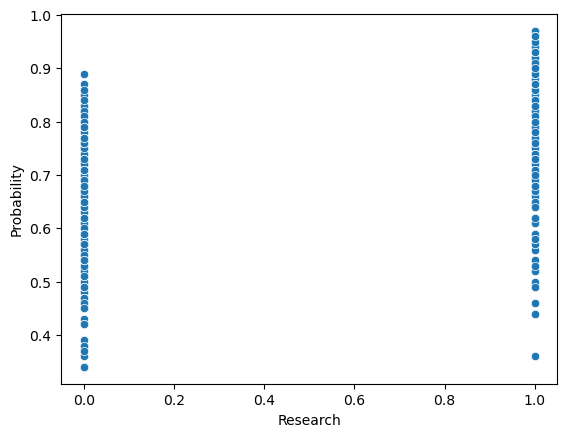

In [94]:
# Research,Probability-----scatterplot
sns.scatterplot(x=df["Research"],y=df["Probability"])
plt.show()

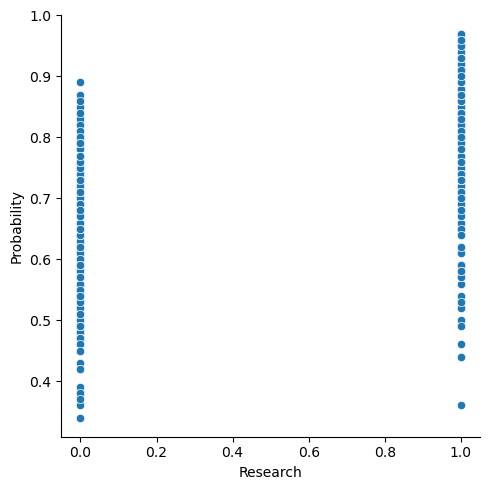

In [95]:
# Research,Probability-----relplot
sns.relplot(x=df["Research"],y=df["Probability"])
plt.show()

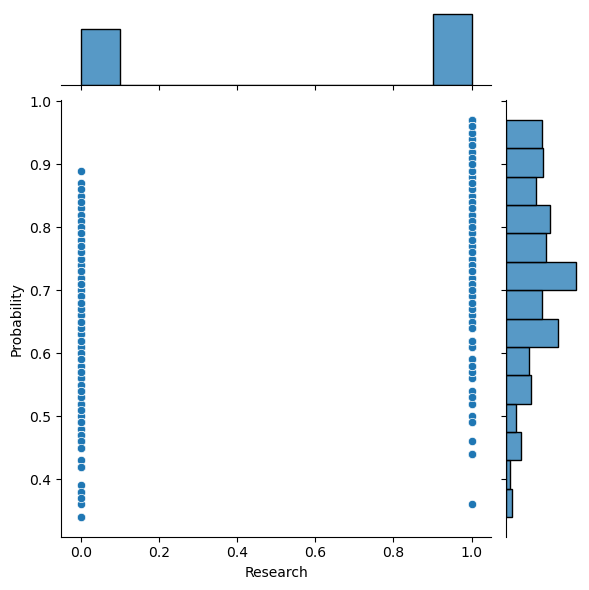

In [96]:
# Research,Probability-----jointplot
sns.jointplot(x=df["Research"],y=df["Probability"])
plt.show()

**Research**
- Pieplot
- Barplot
- countplot
- violinplot

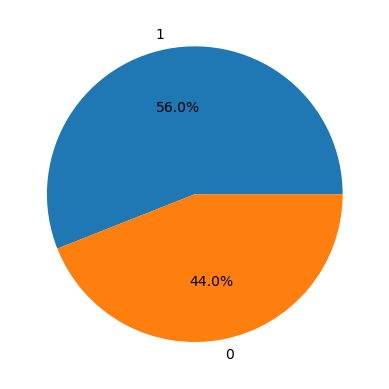

In [97]:
# Research-----Pieplot
plt.pie(df["Research"].value_counts(),labels=df["Research"].unique(),autopct="%0.1f%%")
plt.show()

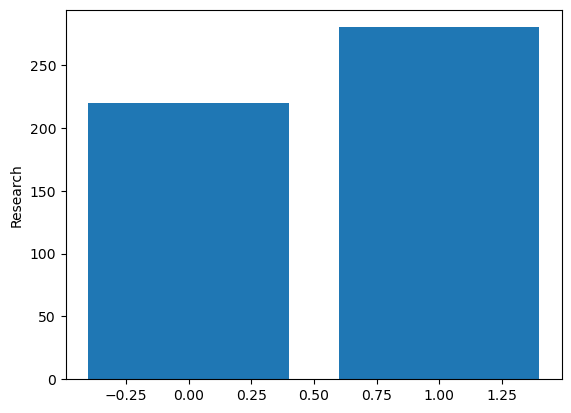

In [98]:
# Research----Barplot
plt.bar(df["Research"].value_counts().index,df["Research"].value_counts())
plt.ylabel("Research")
plt.show()

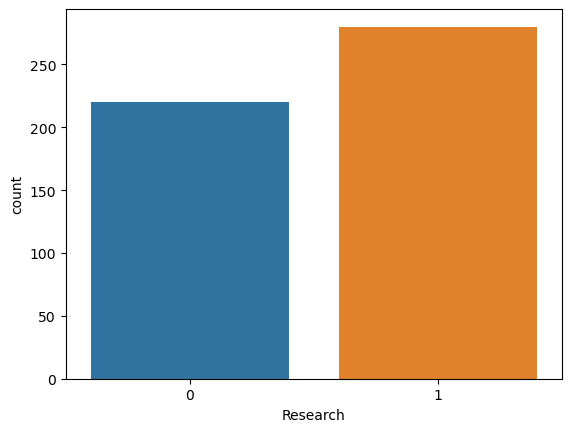

In [99]:
# countplot----Research
sns.countplot(x=df["Research"])
plt.show()

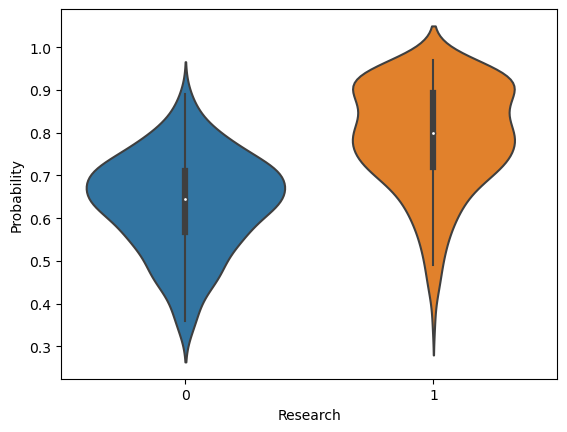

In [100]:
# Research,Probability-----Violinplot
sns.violinplot(x=df["Research"],y=df["Probability"])
plt.show()

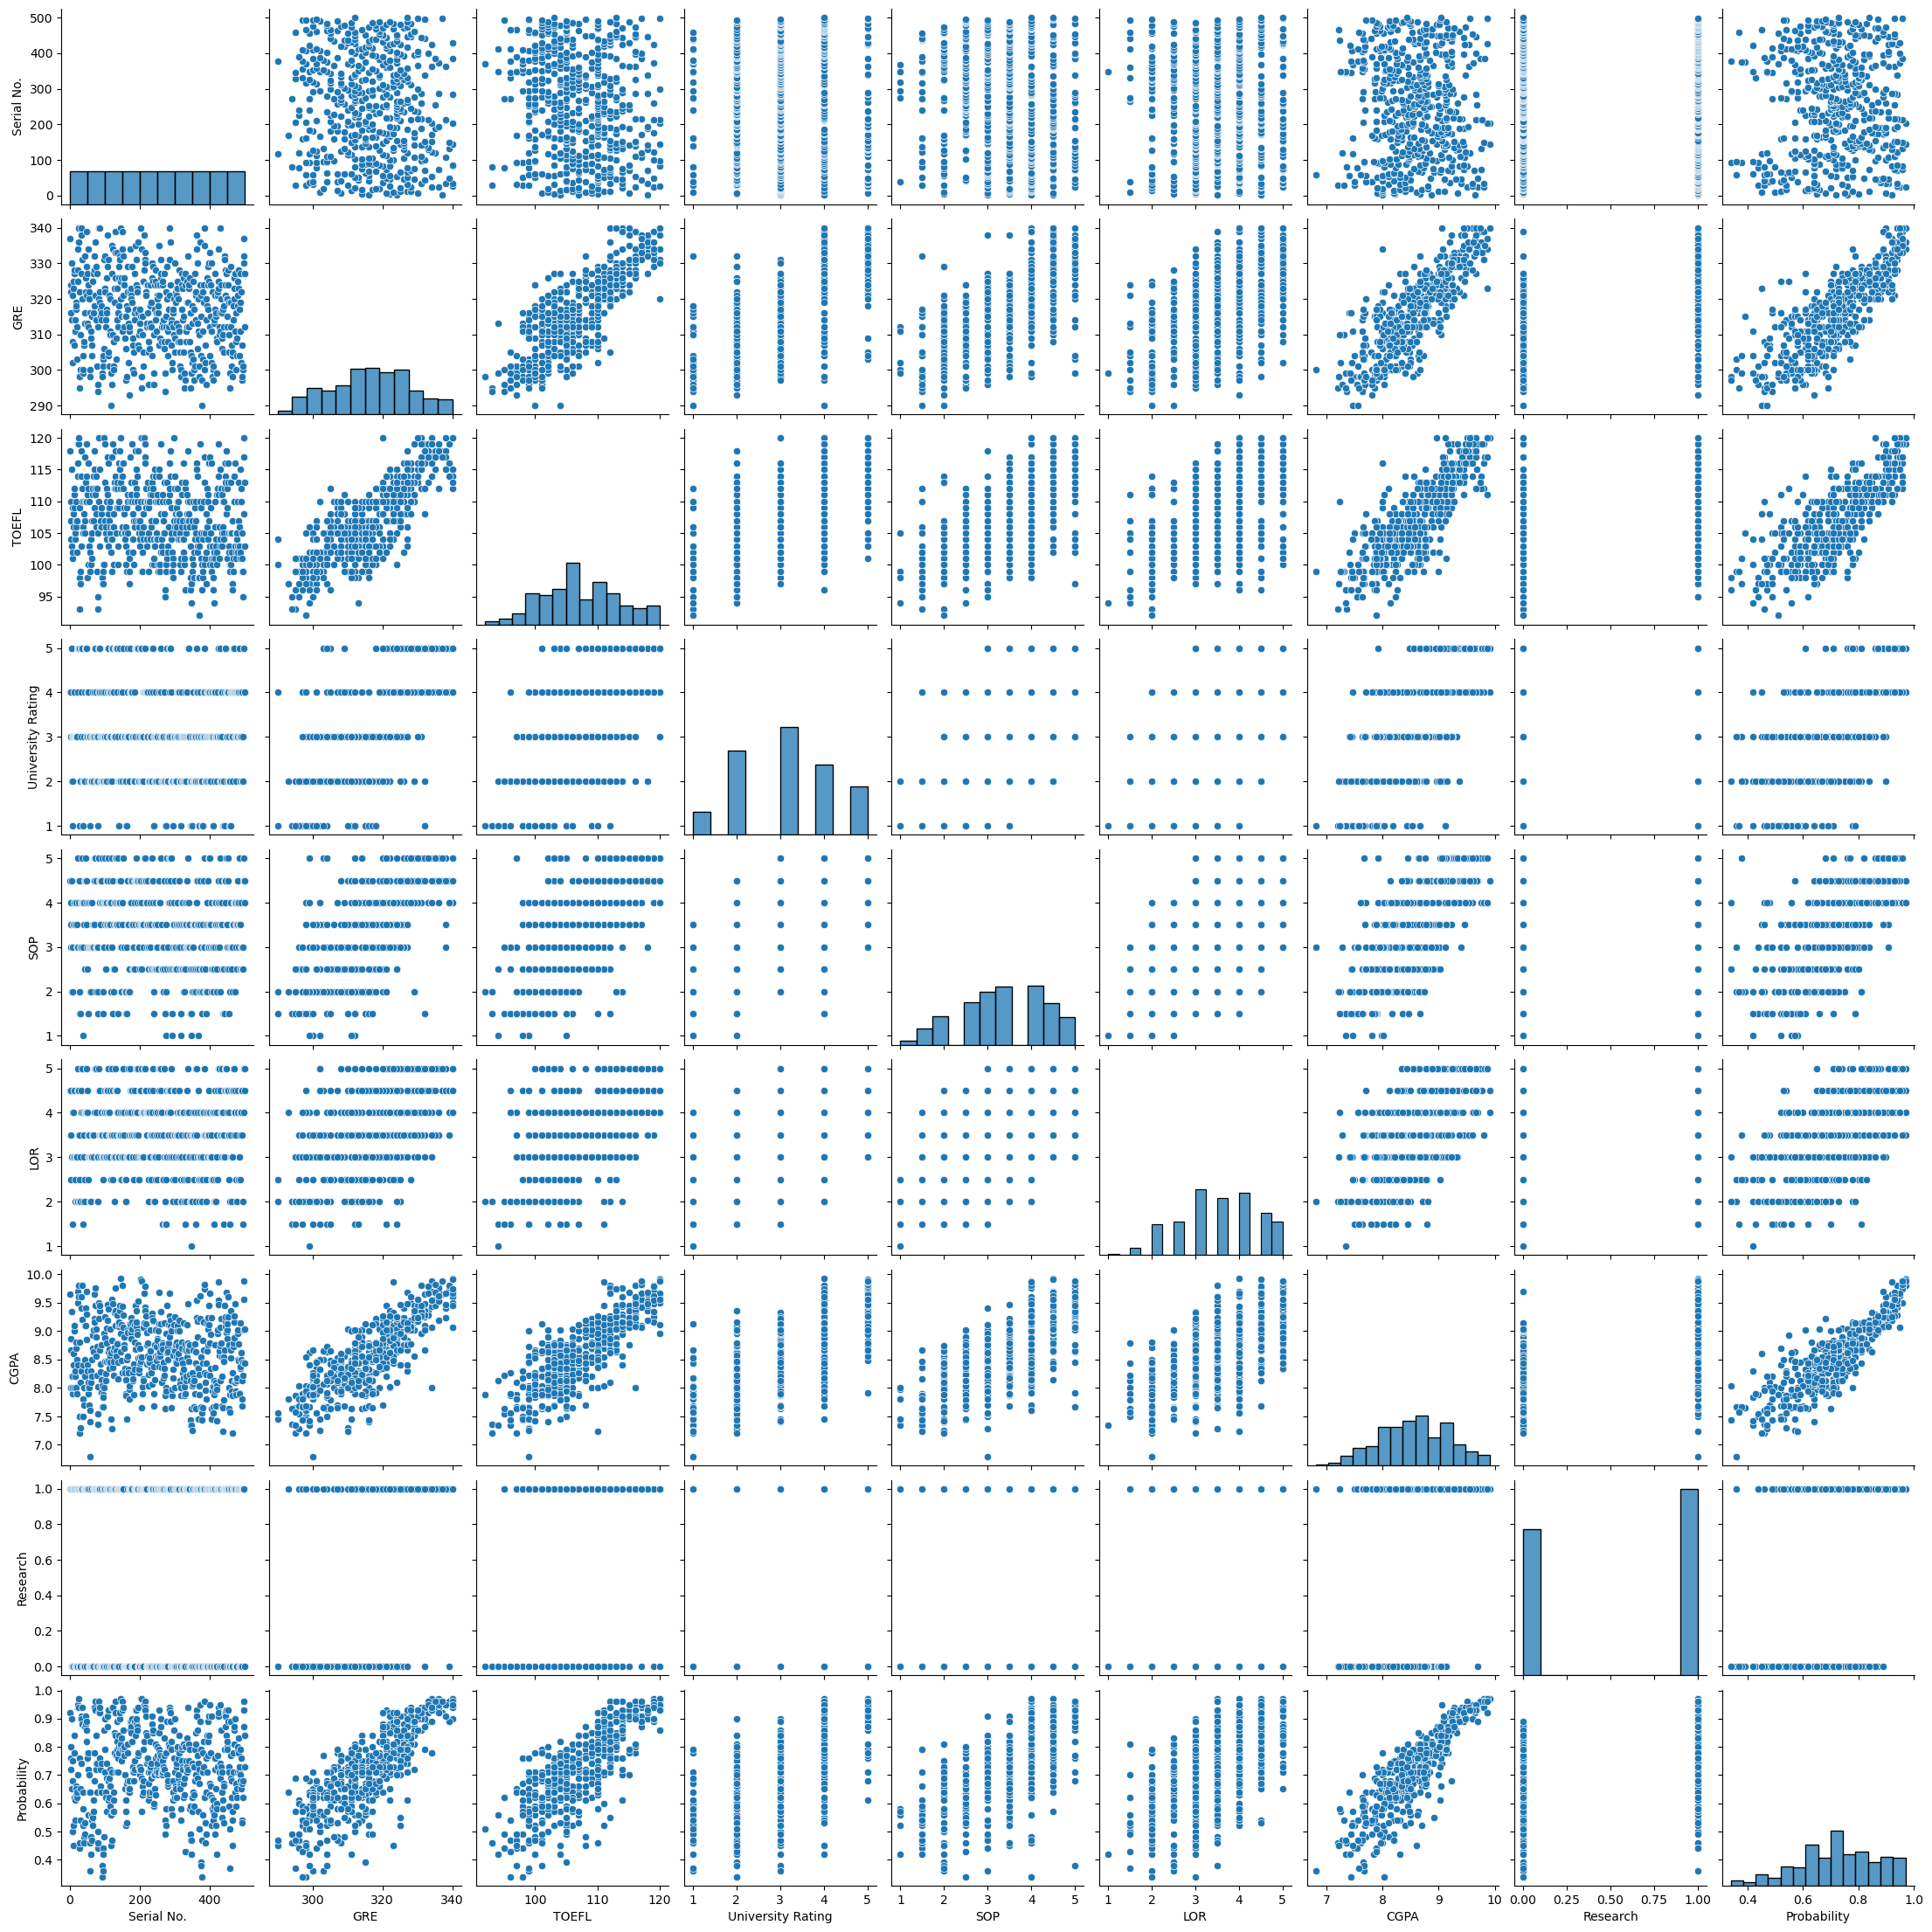

In [101]:
sns.pairplot(df[continuous])
plt.show()

**Heatmap**

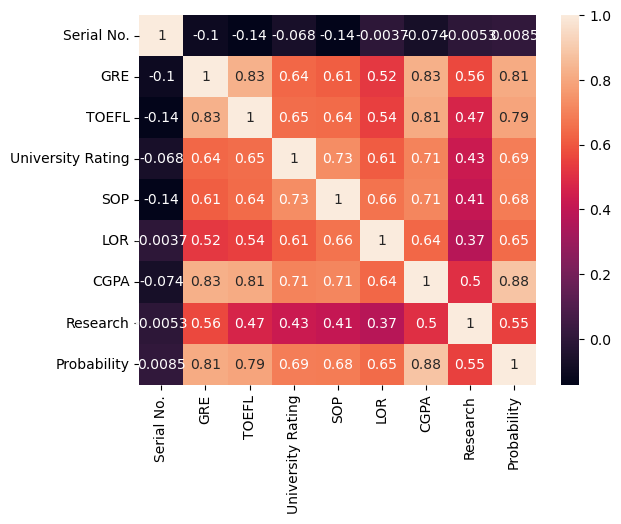

In [102]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

**Skewness**

In [103]:
df[continuous].skew()

Serial No.           0.000000
GRE                 -0.039842
TOEFL                0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Probability         -0.289966
dtype: float64

**Missing values**

In [104]:
df.isnull().sum()

Serial No.           0
GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [105]:
df.isnull().sum()/len(df)

Serial No.           0.0
GRE                  0.0
TOEFL                0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Probability          0.0
dtype: float64

**Duplicates**

In [106]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [107]:
df.duplicated().sum()

0

# Step-3: Data Preprocessing
- Feature selection
- Feature Engineering
- Data cleaning
  - wrong data
  - missing values
  - wrong data type
  - duplicates
  - outliers
- Data Wrangling
  - Feature Transformation(applicable on continuous)
  - Feature scaling(applicable on continuous)
  - Encoding(applicable on discrete categorical)
- **Dont apply any Data Wrangling technique on count variable**

**Feature Selection**
- Feature selection is important here,because dropping of Serial.No is mandatory

In [108]:
# Removing the serial no.
df.drop(columns=["Serial No."],axis=1,inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Data Cleaning**
- wrong data
- Missing values
- wrong Datatype
- Duplicates
- outliers

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                500 non-null    int64  
 1   TOEFL              500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Probability        500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


**Missing values**

In [110]:
df.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [111]:
df.isnull().sum()/len(df)

GRE                  0.0
TOEFL                0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Probability          0.0
dtype: float64

**Duplicates**

In [112]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [113]:
df.duplicated().sum()

0

**Outliers**
- LOR
- Probability

In [114]:
df["LOR"].describe()

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64

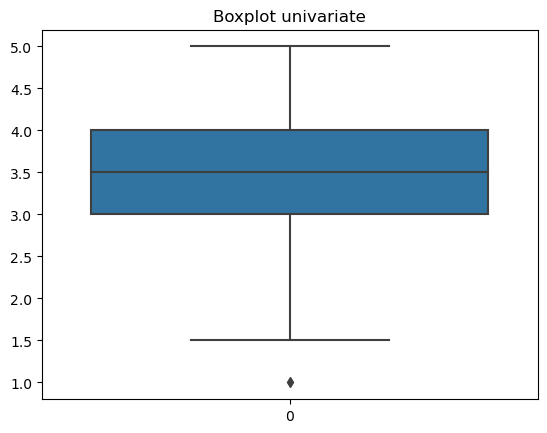

In [115]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["LOR"])
plt.show()

In [116]:
#quantiles
Q1=df["LOR"].quantile(0.25)
print("Q1:",Q1)
Q3=df["LOR"].quantile(0.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit:",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit:",upper_limit)

Q1: 3.0
Q3: 4.0
IQR: 1.0
lower_limit: 1.5
upper_limit: 5.5


In [117]:
Loutliers_index=df[(df["LOR"]<lower_limit)|(df["LOR"]>upper_limit)]
Loutliers_index

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
347,299,94,1,1.0,1.0,7.34,0,0.42


In [118]:
df["LOR"]=df["LOR"].clip(lower=1.5,upper=5.5)
df["LOR"]

0      4.5
1      4.5
2      3.5
3      2.5
4      3.0
      ... 
495    4.0
496    5.0
497    5.0
498    5.0
499    4.5
Name: LOR, Length: 500, dtype: float64

In [119]:
df[(df["LOR"]<lower_limit)|(df["LOR"]>upper_limit)]

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability


In [120]:
df.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

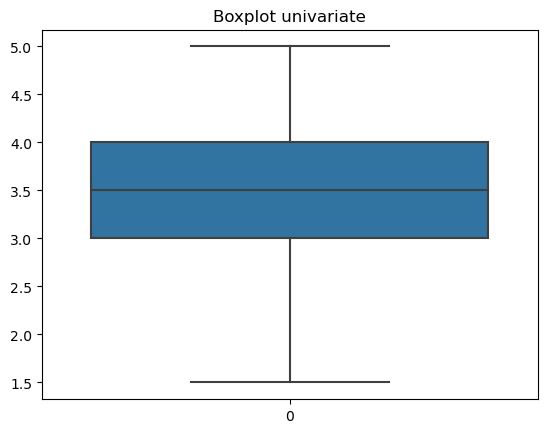

In [121]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["LOR"])
plt.show()

In [122]:
df["Probability"].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Probability, dtype: float64

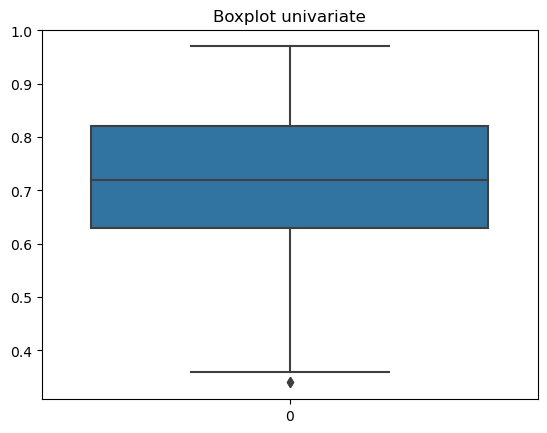

In [123]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["Probability"])
plt.show()

In [124]:
#quantiles
Q1=df["Probability"].quantile(0.25)
print("Q1:",Q1)
Q3=df["Probability"].quantile(0.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit:",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit:",upper_limit)

Q1: 0.63
Q3: 0.82
IQR: 0.18999999999999995
lower_limit: 0.3450000000000001
upper_limit: 1.105


In [125]:
Poutliers_index=df[(df["Probability"]<lower_limit)|(df["Probability"]>upper_limit)]
Poutliers_index

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [126]:
df["Probability"]=df["Probability"].clip(lower=0.3450000000000001,upper=1.105)
df["Probability"]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Probability, Length: 500, dtype: float64

In [127]:
df[(df["Probability"]<lower_limit)|(df["Probability"]>upper_limit)]

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability


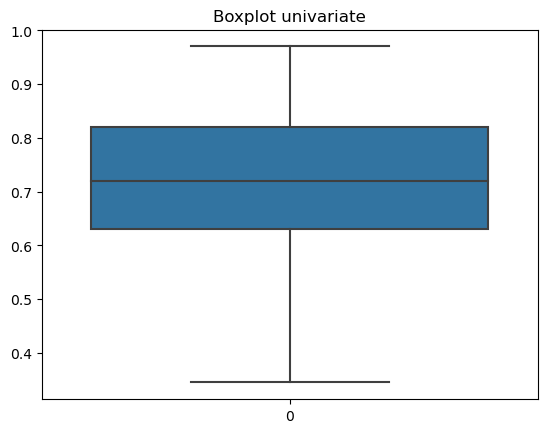

In [128]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["Probability"])
plt.show()

In [129]:
df.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [130]:
df

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**Skewness**

In [131]:
continuous=["GRE", "TOEFL", "University Rating", "SOP", "LOR", "CGPA", "Research", "Probability"]

In [132]:
df[continuous].describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.485000,8.576440,0.560000,0.721760
std,11.295148,6.081868,1.143512,0.991004,0.923027,0.604813,0.496884,0.141087
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.345000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [133]:
df[continuous].skew()

GRE                 -0.039842
TOEFL                0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.130467
CGPA                -0.026613
Research            -0.242475
Probability         -0.287634
dtype: float64

In [ ]:
df["GRE"]=df["GRE"]**(2)
df["GRE"].skew()

In [ ]:
df["TOEFL"]=df["TOEFL"]**(1/6)
df["TOEFL"].skew()

In [ ]:
df["SOP"]=df["SOP"]**(2)
df["SOP"].skew()

In [ ]:
df["LOR"]=df["LOR"]**(2)
df["LOR"].skew()

In [ ]:
df["CGPA"]=df["CGPA"]**(2)
df["CGPA"].skew()

In [ ]:
df["Probability"]=np.exp(df["Probability"])
df["Probability"].skew()

In [134]:
df.columns

Index(['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Probability'],
      dtype='object')

In [135]:
df[continuous].skew()

GRE                 -0.039842
TOEFL                0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.130467
CGPA                -0.026613
Research            -0.242475
Probability         -0.287634
dtype: float64

In [136]:
df

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# Step-4: Modelling & Evaluation

In [137]:
x=df.drop("Probability",axis=1)
y=df["Probability"]

In [138]:
x

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [139]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Probability, Length: 500, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=True)

In [141]:
x_train

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [142]:
y_train

238    0.70
438    0.67
475    0.59
58     0.36
380    0.78
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Probability, Length: 400, dtype: float64

In [143]:
x_test

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1
...,...,...,...,...,...,...,...
11,327,111,4,4.0,4.5,9.00,1
192,322,114,5,4.5,4.0,8.94,1
92,298,98,2,4.0,3.0,8.03,0
221,316,110,3,3.5,4.0,8.56,0


In [144]:
y_test

304    0.620
340    0.750
47     0.890
67     0.570
479    0.790
       ...  
11     0.840
192    0.860
92     0.345
221    0.750
110    0.610
Name: Probability, Length: 100, dtype: float64

In [145]:
x

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [146]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Probability, Length: 500, dtype: float64

In [147]:
# Linear Regression
from sklearn.linear_model import LinearRegression

#Modelling
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train MAE:",mean_absolute_error(y_train,ypred_train))
print("Train MSE:",mean_squared_error(y_train,ypred_train))
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [0.00183245 0.00317149 0.00613837 0.00302145 0.01440906 0.11667079
 0.01988296]
coefficient: -1.2882482131640185
Train MAE: 0.042929219086549786
Train MSE: 0.0035700169341700964
Train RMSE: 0.05974961869476739
Train R2 score 0.8215922250038028
Test R2 score 0.8215300550803959
cv: 0.8000390012814371


In [148]:
train=[]
test=[]
cv=[]

for i in range(0,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)
    
    model_linear.fit(x_train,y_train)
    ypred_train=model_linear.predict(x_train)
    ypred_test=model_linear.predict(x_test)
    
    train.append(r2_score(y_train,ypred_train))
    test.append(r2_score(y_test,ypred_test))
    
    cv.append(cross_val_score(model_linear,x_train,y_train,cv=5).mean())

In [149]:
train

[0.8323281061267676,
 0.8215922250038028,
 0.829570591269029,
 0.8266211108487846,
 0.831294533315584,
 0.8213617630737658,
 0.818521513193639,
 0.8192992305609581,
 0.8295845704408591,
 0.8224123700938002,
 0.8258402589329011,
 0.8064255321159669,
 0.8247347162605865,
 0.8134024352740221,
 0.8123260184980879,
 0.8279721605179796,
 0.8201811364839423,
 0.8098445908505819,
 0.8180525879636277,
 0.8306106143085474,
 0.8291590817988681,
 0.8344724971849269,
 0.8123857436658297,
 0.8204545971565919,
 0.8210171036855564,
 0.8090024367165622,
 0.8225842204236418,
 0.8276675917490532,
 0.8170875132814852,
 0.8223398300816699,
 0.8192118168713233,
 0.8149213501986552,
 0.8216781137938196,
 0.8280588642030331,
 0.8242999341500873,
 0.8223062120281459,
 0.8151788812135058,
 0.8095743539817235,
 0.8257239326613143,
 0.8166435560012484,
 0.8282202462808386,
 0.8234802798055443,
 0.8213379717854046,
 0.8247217238751837,
 0.8310743013989579,
 0.8134712736762343,
 0.8219463348222975,
 0.8277961690149

In [150]:
test

[0.7664397921454146,
 0.8215300550803959,
 0.7927676382340954,
 0.7965891954519853,
 0.7724008290083042,
 0.8215123416635683,
 0.8335826168387509,
 0.8318013063100367,
 0.7859422102968168,
 0.8137535912128167,
 0.7970188749580136,
 0.8770126923533388,
 0.8067671684468662,
 0.8514520312856827,
 0.855289827522111,
 0.7933981836479176,
 0.8267122180269422,
 0.8547033382946652,
 0.8367365717780365,
 0.7893485878524629,
 0.7913052923942745,
 0.7649777506341282,
 0.8532067430770169,
 0.8257653050235715,
 0.8173726889383744,
 0.8637161851777244,
 0.8091696162431797,
 0.7928352901569025,
 0.8445497285733279,
 0.8172347140326793,
 0.8250642116310872,
 0.8487425016359781,
 0.8135941535385847,
 0.7873768859970504,
 0.8059423722446593,
 0.817945630575321,
 0.8468248834417653,
 0.8702897426771964,
 0.8061250725443698,
 0.8365677177654717,
 0.7920844202960738,
 0.8104874656675053,
 0.8187280986509651,
 0.8065308750365737,
 0.7667585655269081,
 0.847011302083442,
 0.8015261933647408,
 0.7942596207766

In [151]:
cv

[0.8221718903031174,
 0.8000390012814371,
 0.8150404506513524,
 0.8131919633726612,
 0.8160834271848267,
 0.8062802206594197,
 0.8099418704387267,
 0.8120133310703516,
 0.8226791015770006,
 0.8097503633956405,
 0.8142460975368533,
 0.7937531424715579,
 0.8182520163607325,
 0.7973246467732904,
 0.7992097196839042,
 0.8158868010633897,
 0.8170455693747609,
 0.7994081708679959,
 0.802013080628513,
 0.8183854461155692,
 0.8138548375117715,
 0.8262621155647416,
 0.8000087220812485,
 0.7982417134674403,
 0.8070144942917356,
 0.8034448338576731,
 0.8115917017495985,
 0.8159389520803613,
 0.7955483456156501,
 0.8116700329845796,
 0.8041276296648949,
 0.8061992846429593,
 0.8065907934954162,
 0.821311644164509,
 0.8091141300894857,
 0.8135049721664384,
 0.7987286041757301,
 0.8010349340517227,
 0.8157438851381912,
 0.8043196088939177,
 0.8180300979916465,
 0.8154100782699727,
 0.8081645723725934,
 0.8056086825525494,
 0.8121016687281385,
 0.8053632766168025,
 0.8088466745448066,
 0.812096389423

In [152]:
df1=pd.DataFrame({"Train":train,"Test":test,"CV":cv})
df1

,Train,Test,CV
0,0.832328,0.766440,0.822172
1,0.821592,0.821530,0.800039
2,0.829571,0.792768,0.815040
3,0.826621,0.796589,0.813192
4,0.831295,0.772401,0.816083
...,...,...,...
96,0.840433,0.741787,0.829760
97,0.818880,0.830804,0.810262
98,0.822551,0.813162,0.806782
99,0.813278,0.852640,0.806391


In [153]:
fm=df1[(abs(df1["Train"]-df1["CV"])<=0.05) & (abs(df1["Train"]-df1["Test"])<=0.05)]
fm

,Train,Test,CV
1,0.821592,0.821530,0.800039
2,0.829571,0.792768,0.815040
3,0.826621,0.796589,0.813192
5,0.821362,0.821512,0.806280
6,0.818522,0.833583,0.809942
...,...,...,...
95,0.816890,0.834517,0.809944
97,0.818880,0.830804,0.810262
98,0.822551,0.813162,0.806782
99,0.813278,0.852640,0.806391


In [154]:
fm[fm["CV"]==fm["CV"].max()]

,Train,Test,CV
8,0.829585,0.785942,0.822679


In [155]:
rs=fm[fm["CV"]==fm["CV"].max()].index.to_list()[0]
print("Best random state number:",rs)

Best random state number: 8


In [156]:
train=[]
test=[]
cv=[]

for i in range(0,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)
    
    model_linear.fit(x_train,y_train)
    ypred_train=model_linear.predict(x_train)
    ypred_test=model_linear.predict(x_test)
    
    train.append(r2_score(y_train,ypred_train))
    test.append(r2_score(y_test,ypred_test))
    
    cv.append(cross_val_score(model_linear,x_train,y_train,cv=5).mean())
    
df1=pd.DataFrame({"Train":train,"Test":test,"CV":cv})
fm=df1[(abs(df1["Train"]-df1["CV"])<=0.05) & (abs(df1["Train"]-df1["Test"])<=0.05)]
rs=fm[fm["CV"]==fm["CV"].max()].index.to_list()[0]
print("Best random state number:",rs)

Best random state number: 8


In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=8)

# Machine learning Algorithms
- **Regression**   
   -Simple Linear Regression   
   -Multiple Linear Regression
- **Polynomial Regression**
- **Lasso Regression**
- **Ridge Regression**
- **ElasticNet Regression**

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

# 1.Linear Regression

In [159]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=8)

#Modelling
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 0.00190604  0.00324243  0.00584008 -0.00204992  0.0164567   0.12002768
  0.02533046]
coefficient: -1.3421065185912606
Train R2 score 0.8295845704408591
Test R2 score 0.7859422102968168
cv: 0.8226791015770006


**Linearity of errors**

In [160]:
error=y_test-ypred_test

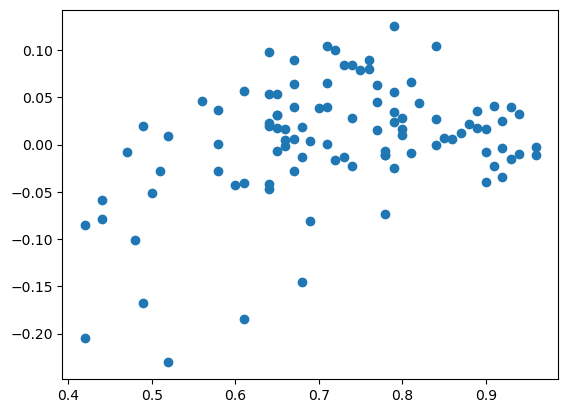

In [161]:
plt.scatter(y_test,error)
plt.show()

**Normality of Errors**

In [162]:
error.skew()

-1.3056083587970915

<Axes: xlabel='Probability', ylabel='Count'>

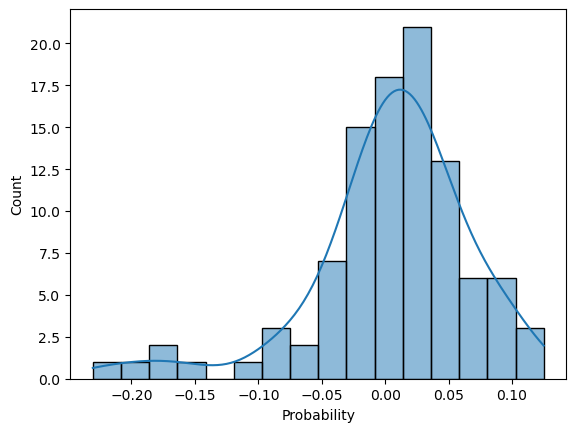

In [163]:
sns.histplot(error,kde=True)

**Equal Variance of Errors**

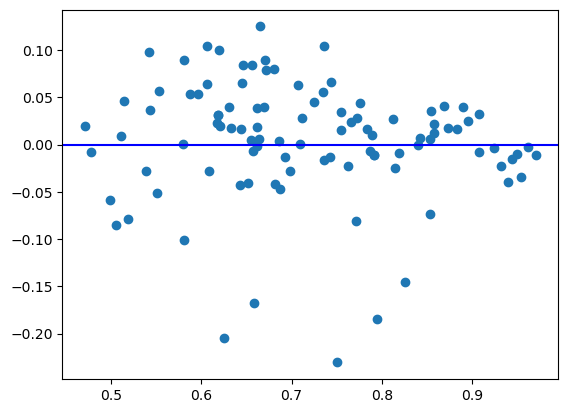

In [164]:
plt.scatter(ypred_test,error)
plt.axhline(y=0,color="blue")
plt.show()

**Variable Significance**

In [165]:
import statsmodels.formula.api as smf
model_linear=smf.ols("y~x",data=df).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     324.8
Date:                Thu, 01 Aug 2024   Prob (F-statistic):          6.30e-180
Time:                        12:41:13   Log-Likelihood:                 701.85
No. Observations:                 500   AIC:                            -1388.
Df Residuals:                     492   BIC:                            -1354.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2748      0.104    -12.234      0.000      -1.479      -1.070
x[0]           0.0019      0.001      3.695      0.000       0.001       0.003
x[1]           0.0028      0.001      3.188      0.002       0.001       0.004
x[2]           0.0059      0.004      1.562      0.119      -0.002       0.013
x[3]           0.0017      0.005      0.368      0.713      -0.007       0.011
x[4]           0.0168      0.004      4.062      0.000       0.009       0.025
x[5]           0.1184      0.010     12.211      0.000       0.099       0.137
x[6]           0.0243      0.007      3.682      0.000       0.011       0.037
==============================================================================
Omnibus:                      111.900   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.404
Skew:                          -1.154   Prob(JB):                     7.73e-57
Kurtosis:                       5.661   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
df

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**AV model**
  - Partial differentiation instead of Normal Distribution

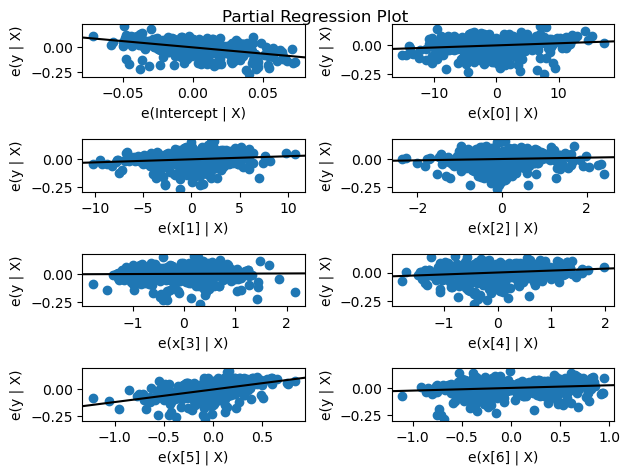

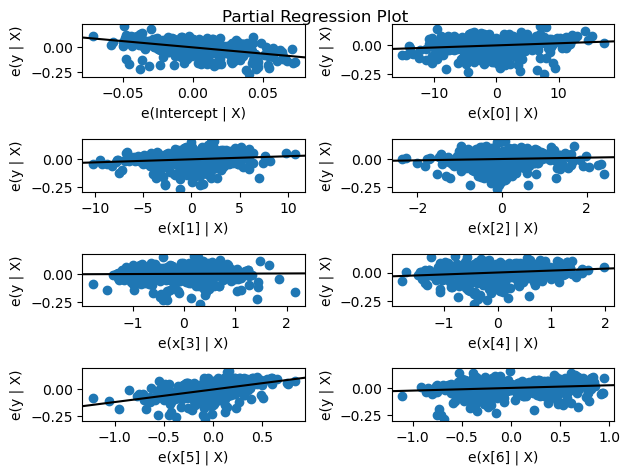

In [167]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model_linear)

**1.1 Linear Regression**

In [168]:
x

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [169]:
x=x.drop("TOEFL",axis=1)
y=df["Probability"]

In [170]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Probability, Length: 500, dtype: float64

In [171]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 0.00190604  0.00324243  0.00584008 -0.00204992  0.0164567   0.12002768
  0.02533046]
coefficient: -1.3421065185912606
Train R2 score 0.8295845704408591
Test R2 score 0.7859422102968168
cv: 0.8226791015770006


**1.2 Linear Regression**

In [172]:
x

,GRE,University Rating,SOP,LOR,CGPA,Research
0,337,4,4.5,4.5,9.65,1
1,324,4,4.0,4.5,8.87,1
2,316,3,3.0,3.5,8.00,1
3,322,3,3.5,2.5,8.67,1
4,314,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...
495,332,5,4.5,4.0,9.02,1
496,337,5,5.0,5.0,9.87,1
497,330,5,4.5,5.0,9.56,1
498,312,4,4.0,5.0,8.43,0


In [173]:
x=x.drop("University Rating",axis=1)
y=df["Probability"]

In [174]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 0.00190604  0.00324243  0.00584008 -0.00204992  0.0164567   0.12002768
  0.02533046]
coefficient: -1.3421065185912606
Train R2 score 0.8295845704408591
Test R2 score 0.7859422102968168
cv: 0.8226791015770006


**1.3 Linear Regression**

In [175]:
x=x.drop("SOP",axis=1)
y=df["Probability"]

In [176]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 0.00190604  0.00324243  0.00584008 -0.00204992  0.0164567   0.12002768
  0.02533046]
coefficient: -1.3421065185912606
Train R2 score 0.8295845704408591
Test R2 score 0.7859422102968168
cv: 0.8226791015770006


**1.3 Linear Regression**

In [177]:
df

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [178]:
x=df.drop(columns=["Probability","TOEFL","University Rating","SOP"],axis=1)
y=df["Probability"]

In [179]:
x

,GRE,LOR,CGPA,Research
0,337,4.5,9.65,1
1,324,4.5,8.87,1
2,316,3.5,8.00,1
3,322,2.5,8.67,1
4,314,3.0,8.21,0
...,...,...,...,...
495,332,4.0,9.02,1
496,337,5.0,9.87,1
497,330,5.0,9.56,1
498,312,5.0,8.43,0


In [180]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 0.00190604  0.00324243  0.00584008 -0.00204992  0.0164567   0.12002768
  0.02533046]
coefficient: -1.3421065185912606
Train R2 score 0.8295845704408591
Test R2 score 0.7859422102968168
cv: 0.8226791015770006


In [181]:
import statsmodels.formula.api as smf
Linear=smf.ols("y~x",data=df).fit()
Linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     550.2
Date:                Thu, 01 Aug 2024   Prob (F-statistic):          1.35e-180
Time:                        12:44:24   Log-Likelihood:                 693.94
No. Observations:                 500   AIC:                            -1378.
Df Residuals:                     495   BIC:                            -1357.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3728      0.100    -13.795      0.000      -1.568      -1.177
x[0]           0.0027      0.000      6.044      0.000       0.002       0.004
x[1]           0.0202      0.004      5.270      0.000       0.013       0.028
x[2]           0.1344      0.009     15.266      0.000       0.117       0.152
x[3]           0.0243      0.007      3.647      0.000       0.011       0.037
==============================================================================
Omnibus:                      100.596   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.889
Skew:                          -1.058   Prob(JB):                     3.98e-49
Kurtosis:                       5.495   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2. Polynomial Regression

In [182]:
x=df.drop("Probability",axis=1)
y=df["Probability"]

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=8)

In [184]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=1)

In [185]:
x_train_poly=pd.DataFrame(polynomial_converter.fit_transform(x_train))
x_train_poly

,0,1,2,3,4,5,6,7
0,1.0,319.0,106.0,3.0,3.5,2.5,8.33,1.0
1,1.0,314.0,102.0,4.0,2.5,2.0,7.88,1.0
2,1.0,298.0,98.0,2.0,4.0,3.0,8.03,0.0
3,1.0,340.0,112.0,4.0,5.0,4.5,9.66,1.0
4,1.0,326.0,113.0,5.0,4.5,4.0,9.40,1.0
...,...,...,...,...,...,...,...,...
395,1.0,323.0,112.0,5.0,4.0,4.5,8.78,0.0
396,1.0,334.0,116.0,4.0,4.0,3.5,9.54,1.0
397,1.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0
398,1.0,312.0,107.0,3.0,3.0,3.0,8.46,1.0


In [186]:
x_test_poly=pd.DataFrame(polynomial_converter.transform(x_test))
x_test_poly

,0,1,2,3,4,5,6,7
0,1.0,310.0,103.0,2.0,2.5,2.5,8.24,0.0
1,1.0,316.0,102.0,3.0,2.0,3.0,7.40,0.0
2,1.0,311.0,106.0,2.0,3.5,3.0,8.26,1.0
3,1.0,311.0,104.0,2.0,2.5,3.5,8.48,0.0
4,1.0,331.0,120.0,3.0,4.0,4.0,8.96,1.0
...,...,...,...,...,...,...,...,...
95,1.0,338.0,117.0,4.0,3.5,4.5,9.46,1.0
96,1.0,331.0,119.0,4.0,5.0,4.5,9.34,1.0
97,1.0,303.0,98.0,1.0,2.0,2.5,7.65,0.0
98,1.0,317.0,106.0,2.0,2.0,3.5,8.12,0.0


In [187]:
#Training & Testing Data
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2)
x_train_poly=pd.DataFrame(polynomial_converter.fit_transform(x_train))
x_test_poly=pd.DataFrame(polynomial_converter.transform(x_test))

#Modelling
from sklearn.linear_model import LinearRegression
model_poly=LinearRegression()
model_poly.fit(x_train_poly,y_train)

print("Intercept:",model_poly.coef_)
print("coefficient:",model_poly.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_poly.predict(x_train_poly)
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_poly.predict(x_test_poly)
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_poly,x_train_poly,y_train,cv=5).mean())

Intercept: [ 4.35850508e-12  3.09128703e-03  3.52287252e-02  1.09121594e-01
 -2.59139813e-01  2.86430681e-02  2.51143681e-01  4.86362929e-03
  1.02305288e-05  4.54030337e-05 -4.10784103e-04  7.72549409e-04
  7.80703323e-04 -1.93823229e-03 -3.95670613e-04 -2.52197048e-04
  6.75114710e-04  1.39638836e-03 -6.36739713e-04  4.05999482e-04
 -4.69199677e-04 -7.62332513e-04  2.80656004e-02 -6.68574372e-03
 -1.42255068e-02  1.60165293e-02 -1.86401281e-02  9.64701082e-03
 -1.42849889e-02 -1.09810246e-02  5.37640838e-03 -2.79257364e-02
 -2.60228815e-03  3.57932366e-02  2.19835938e-02  4.86362929e-03]
coefficient: -3.5069719940239086
Train RMSE: 0.05545776388981183
Train R2 score 0.8480547744591004
Test RMSE: 0.06440225745363615
Test R2 score 0.7741245901919759
cv: 0.7311995177343869


In [188]:
train_d=[]
test_d=[]

for i in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=i)
    x_train_poly=pd.DataFrame(polynomial_converter.fit_transform(x_train))
    x_test_poly=pd.DataFrame(polynomial_converter.transform(x_test))

    model_poly.fit(x_train_poly,y_train)
    
    ypred_train=model_poly.predict(x_train_poly)
    train_d.append(r2_score(y_train,ypred_train))

    ypred_test=model_poly.predict(x_test_poly)
    test_d.append(r2_score(y_test,ypred_test))

In [189]:
train_d

[0.8295845704408591,
 0.8480547744591004,
 0.8756064787607184,
 0.9519234026150758,
 0.9998772282114969,
 0.9997519175083542,
 0.9996168335572883,
 0.9996240848750013,
 0.9998775995144636]

In [190]:
test_d

[0.7859422102968164,
 0.7741245901919759,
 0.7461641724642332,
 -2.8957072494832232,
 -220.68168149523888,
 -117.8147950525802,
 -82.50515564134858,
 -74.02599145380321,
 -71.96622829043996]

In [191]:
#Training & Testing Data
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=1)
x_train_poly=pd.DataFrame(polynomial_converter.fit_transform(x_train))
x_test_poly=pd.DataFrame(polynomial_converter.transform(x_test))

#Modelling
from sklearn.linear_model import LinearRegression
model_poly=LinearRegression()
model_poly.fit(x_train_poly,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_poly.predict(x_train_poly)
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_poly.predict(x_test_poly)
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_poly,x_train_poly,y_train,cv=5).mean())

Intercept: [ 0.00190604  0.00324243  0.00584008 -0.00204992  0.0164567   0.12002768
  0.02533046]
coefficient: -1.3421065185912606
Train RMSE: 0.058731796071594844
Train R2 score 0.8295845704408591
Test RMSE: 0.06269488820384075
Test R2 score 0.7859422102968164
cv: 0.8226791015770006


# Lasso Regression

In [192]:
x=df.drop("Probability",axis=1)
y=df["Probability"]

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=8)

In [194]:
#Modelling
from sklearn.linear_model import Lasso
model_lasso=Lasso()
model_lasso.fit(x_train,y_train)

print("Intercept:",model_lasso.coef_)
print("coefficient:",model_lasso.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_lasso.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_lasso.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_lasso,x_train,y_train,cv=5).mean())

Intercept: [0.00244196 0.         0.         0.         0.         0.
 0.        ]
coefficient: -0.051505947169828925
Train R2 score 0.2784952200526528
Test R2 score 0.2792808968245799
cv: 0.2716189972752624


In [196]:
x=df.drop(columns=["TOEFL","University Rating","SOP","LOR","CGPA","Research","Probability"],axis=1)
y=df["Probability"]

In [197]:
x

,GRE
0,337
1,324
2,316
3,322
4,314
...,...
495,332
496,337
497,330
498,312


In [198]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Probability, Length: 500, dtype: float64

In [199]:
estimator=Lasso()

param_grid={"alpha":list(range(1,100))}

from sklearn.model_selection import GridSearchCV
model_lasso=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
model_lasso.fit(x_train,y_train)
model_lasso.best_params_
model_lasso.best_estimator_

Lasso(alpha=1)

In [200]:
#Modelling
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=1)
model_lasso.fit(x_train,y_train)

print("Intercept:",model_lasso.coef_)
print("coefficient:",model_lasso.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_lasso.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_lasso.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_lasso,x_train,y_train,cv=5).mean())

Intercept: [0.00244196 0.         0.         0.         0.         0.
 0.        ]
coefficient: -0.051505947169828925
Train R2 score 0.2784952200526528
Test R2 score 0.2792808968245799
cv: 0.2716189972752624


# Ridge Regression

In [201]:
x=df.drop("Probability",axis=1)
y=df["Probability"]

In [202]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=8)

In [203]:
#Modelling
from sklearn.linear_model import Ridge
model_ridge=Ridge()
model_ridge.fit(x_train,y_train)

print("Intercept:",model_ridge.coef_)
print("coefficient:",model_ridge.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_ridge.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_ridge.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_ridge,x_train,y_train,cv=5).mean())

Intercept: [ 0.00199513  0.00333853  0.0060726  -0.00172361  0.01672038  0.11631198
  0.02497794]
coefficient: -1.3513169084253251
Train R2 score 0.8295308153851241
Test R2 score 0.7860902201434505
cv: 0.822626581648036


In [204]:
estimator=Ridge()
param_grid={"alpha":list(range(1,100))}

from sklearn.model_selection import GridSearchCV
model_ridge=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
model_ridge.fit(x_train,y_train)
model_ridge.best_params_
model_ridge.best_estimator_

Ridge(alpha=1)

In [205]:
#Modelling
from sklearn.linear_model import Ridge
model_ridge=Ridge(alpha=1)
model_ridge.fit(x_train,y_train)

print("Intercept:",model_ridge.coef_)
print("coefficient:",model_ridge.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_ridge.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_ridge.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_ridge,x_train,y_train,cv=5).mean())

Intercept: [ 0.00199513  0.00333853  0.0060726  -0.00172361  0.01672038  0.11631198
  0.02497794]
coefficient: -1.3513169084253251
Train R2 score 0.8295308153851241
Test R2 score 0.7860902201434505
cv: 0.822626581648036


# Elasticnet Regression

In [206]:
x=df.drop("Probability",axis=1)
y=df["Probability"]

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=8)

In [208]:
#Modelling
from sklearn.linear_model import ElasticNet
model_elastic=ElasticNet()
model_elastic.fit(x_train,y_train)

print("Intercept:",model_elastic.coef_)
print("coefficient:",model_elastic.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_elastic.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_elastic.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_elastic,x_train,y_train,cv=5).mean())

Intercept: [0.00637543 0.         0.         0.         0.         0.
 0.        ]
coefficient: -1.2972953333802557
Train R2 score 0.5706086750670674
Test R2 score 0.5493148712304812
cv: 0.5669982317019009


In [209]:
estimator=ElasticNet()
param_grid={"alpha":list(range(1,101)),
            "l1_ratio":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

from sklearn.model_selection import GridSearchCV
model_elastic=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
model_elastic.fit(x_train,y_train)
model_elastic.best_params_
model_elastic.best_estimator_

ElasticNet(alpha=1, l1_ratio=0)

In [210]:
#Modelling
from sklearn.linear_model import ElasticNet
model_elastic=ElasticNet(alpha=1, l1_ratio=0)
model_elastic.fit(x_train,y_train)

print("Intercept:",model_elastic.coef_)
print("coefficient:",model_elastic.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_elastic.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_elastic.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_elastic,x_train,y_train,cv=5).mean())

Intercept: [0.00533145 0.00684454 0.0081358  0.00627018 0.01117192 0.01071527
 0.00420293]
coefficient: -1.880784702839737
Train R2 score 0.7700335969082802
Test R2 score 0.7121940725767754
cv: 0.7655903153934572


**Since the Linear Regression algorithm has the highest accuracy, the model selected for this problem is Linear Regression**

In [211]:
# Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearRegression(),x,y,cv=5)
print("Highest Accuracy:{}%".format(round(sum(scores)*100/len(scores)),3))

Highest Accuracy:81%


In [212]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=8)
print(len(x_train),len(x_test))

400 100


In [213]:
# Creating Linear Regression Model
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)
model_linear.score(x_test,y_test)

0.7859422102968168

**Predicting the values using our trained model**

In [217]:
# Prediction 1
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print("Chance of getting into UCLA is {}%".format(round(model_linear.predict([[337,118,4,4.5,4.5,9.65,0]])[0]*100,3)))

Chance of getting into UCLA is 92.929%


In [218]:
# Prediction 1
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print("Chance of getting into UCLA is {}%".format(round(model_linear.predict([[320,113,2,2.0,2.5,8.64,1]])[0]*100,3)))

Chance of getting into UCLA is 74.531%
